In [1]:
from F1_library import libraryF1dataNotebook as libraryDataF1
import pandas as pd
import numpy as np
import fastf1 as ff1

from fastf1 import utils
from matplotlib import pyplot as plt

# FORMULA 1 HEINEKEN SILVER LAS VEGAS GRAND PRIX 2024
The Las Vegas Grand Prix is a motor racing event that forms part of the Formula One World Championship, taking place in Paradise, Nevada, in the United States. It is conducted as a night race on a temporary street circuit that includes parts of the Las Vegas Strip. The first race was held on November 18, 2023. Formula One and Las Vegas have signed an agreement until 2025 for the race
Source: Wikipedia

## Upgrades
In this section those upgrades brought by the teams will be shown.
<table>
<tr>
    <td>
    Team
    </td>
    <td>
    Updated component
    </td>
    <td>
    Upgrade type
    </td>
</tr>
<tr>
    <td>
    Red Bull Racing
    </td>
    <td>
    Front wing
    </td>
    <td>
    Circuit specific
    </td>
</tr>
<tr>
    <td>
    Red Bull Racing
    </td>
    <td>
    Front Fences
    </td>
    <td>
    Performance
    </td>
</tr>
<tr>
    <td>
    Mercedes
    </td>
    <td>
    Front Wing
    </td>
    <td>
    Circuit specific
    </td>
</tr>
<tr>
    <td>
    Ferrari
    </td>
    <td>
   Front wing
    </td>
    <td>
    Circuit specific
    </td>
</tr>
<tr>
    <td>
    Ferrari
    </td>
    <td>
   Floor fences
    </td>
    <td>
    Performance
    </td>
</tr>
<tr>
    <td>
    Ferrari
    </td>
    <td>
   Floor body
    </td>
    <td>
    Performance
    </td>
</tr>
<tr>
    <td>
    Ferrari
    </td>
    <td>
   Front edge
    </td>
    <td>
    Performance
    </td>
</tr>
<tr>
    <td>
    McLaren
    </td>
    <td>
    Front wing
    </td>
    <td>
    Circuit specific
    </td>
</tr>
<tr>
    <td>
    Aston Martin
    </td>
    <td>
    Front wing
    </td>
    <td>
    Circuit specific
    </td>
</tr>
<tr>
    <td>
    BWT Alpine F1 Team
    </td>
    <td>
    Front corner
    </td>
    <td>
    Performance
    </td>
</tr>
<tr>
    <td>
    Visa Cash App RB
    </td>
    <td>
    Coke/Engine Cover
    </td>
    <td>
    Performance
    </td>
</tr>
<tr>
    <td>
    Visa Cash App RB
    </td>
    <td>
    Rear suspension
    </td>
    <td>
    Other- Local flow aligment
    </td>
</tr>
<tr>
    <td>
    Visa Cash App RB
    </td>
    <td>
    Rear corner
    </td>
    <td>
    Performance
    </td>
</tr>
<tr>
    <td>
    Visa Cash App RB
    </td>
    <td>
    Mirror
    </td>
    <td>
    Circuit specific
    </td>
</tr>
<tr>
    <td>
    Kick Sauber
    </td>
    <td>
    Floor Body
    </td>
    <td>
    Performance
    </td>
</tr>
<tr>
    <td>
    Kick Sauber
    </td>
    <td>
    Floor fences
    </td>
    <td>
    Performance
    </td>
</tr>
<tr>
    <td>
    Kick Sauber
    </td>
    <td>
    Floor Edge
    </td>
    <td>
    Performance
    </td>
</tr>
<tr>
    <td>
    Kick Sauber
    </td>
    <td>
    Diffuser
    </td>
    <td>
    Performance
    </td>
</tr>
</table>

## Obtain session information

In [2]:
libraryDataF1.obtain_information('sessions',year=2024,country_acronym='USA').query("circuit_short_name== 'Las Vegas'")

,session_key,session_name,date_start,date_end,gmt_offset,session_type,meeting_key,location,country_key,country_code,country_name,circuit_key,circuit_short_name,year
10,9637,Practice 1,2024-11-22T02:30:00+00:00,2024-11-22T03:30:00+00:00,-08:00:00,Practice,1250,Las Vegas,19,USA,United States,152,Las Vegas,2024
11,9638,Practice 2,2024-11-22T06:00:00+00:00,2024-11-22T07:00:00+00:00,-08:00:00,Practice,1250,Las Vegas,19,USA,United States,152,Las Vegas,2024


## Free Practice 1
### Obtain setup

In [3]:
practice = libraryDataF1.obtain_information('laps',session_key=9637)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9637)
drivers = libraryDataF1.obtain_information('drivers',session_key=9637)

In [5]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointables2 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])
jointables2

,meeting_key,session_key,driver_number,i1_speed,i2_speed,st_speed,date_start,lap_duration,is_pit_out_lap,duration_sector_1,duration_sector_2,duration_sector_3,segments_sector_1,segments_sector_2,segments_sector_3,lap_number,compound,name_acronym,full_name,team_name
0,1250,9637,81,132.0,167,240,2024-11-22T02:30:05.152000+00:00,NaN,True,NaN,45.510,51.529,"[2064, 2064, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049]","[2048, 2049, 2049, 2048, 2049, 2048, 2048, 2064]",1,MEDIUM,PIA,Oscar PIASTRI,McLaren
1,1250,9637,24,133.0,181,173,2024-11-22T02:30:08.004000+00:00,NaN,True,NaN,46.654,47.705,"[2064, 2064, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 0]",1,MEDIUM,ZHO,ZHOU Guanyu,Kick Sauber
2,1250,9637,31,130.0,159,144,2024-11-22T02:30:11.071000+00:00,NaN,True,NaN,45.396,60.500,"[2064, 2064, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 2049]",1,MEDIUM,OCO,Esteban OCON,Alpine
3,1250,9637,10,138.0,168,251,2024-11-22T02:30:12.879000+00:00,NaN,True,NaN,43.001,57.367,"[2064, 2064, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 2049]",1,MEDIUM,GAS,Pierre GASLY,Alpine
4,1250,9637,22,146.0,181,140,2024-11-22T02:30:16.481000+00:00,NaN,True,NaN,44.273,49.815,"[2064, 2064, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2051, 2049, 2049, 2048, 2049, 2049]",1,MEDIUM,TSU,Yuki TSUNODA,RB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,1250,9637,10,153.0,194,192,2024-11-22T03:33:39.168000+00:00,142.790,False,52.823,36.277,53.690,"[None, 2048, 2048, 2048, 2048, 2048]","[2048, 2048, 2048, 2048, 2048, 2048, 2048]",[],24,SOFT,GAS,Pierre GASLY,Alpine
507,1250,9637,4,151.0,160,193,2024-11-22T03:33:40.947000+00:00,151.144,False,56.798,39.536,54.810,"[None, 2048, 2048, 2048, 2048, 2048]","[2048, 2048, 2048, 2048, 2048, 2048, 2048]",[],27,MEDIUM,NOR,Lando NORRIS,McLaren
508,1250,9637,16,125.0,171,241,2024-11-22T03:33:53.811000+00:00,144.764,False,54.441,41.541,48.782,"[None, 2048, 2048, 2048, 2048, 2048]","[2048, 2048, 2048, 2048, 2048, 2048, 2048]",[],27,MEDIUM,LEC,Charles LECLERC,Ferrari
509,1250,9637,23,134.0,191,212,2024-11-22T03:33:54.599000+00:00,140.470,False,50.718,41.124,48.628,"[None, 2048, 2048, 2048, 2048, 2048]","[2048, 2048, 2048, 2048, 2048, 2048, 2048]",[],26,SOFT,ALB,Alexander ALBON,Williams


### See race pace by means of the charts

### Medium tyres

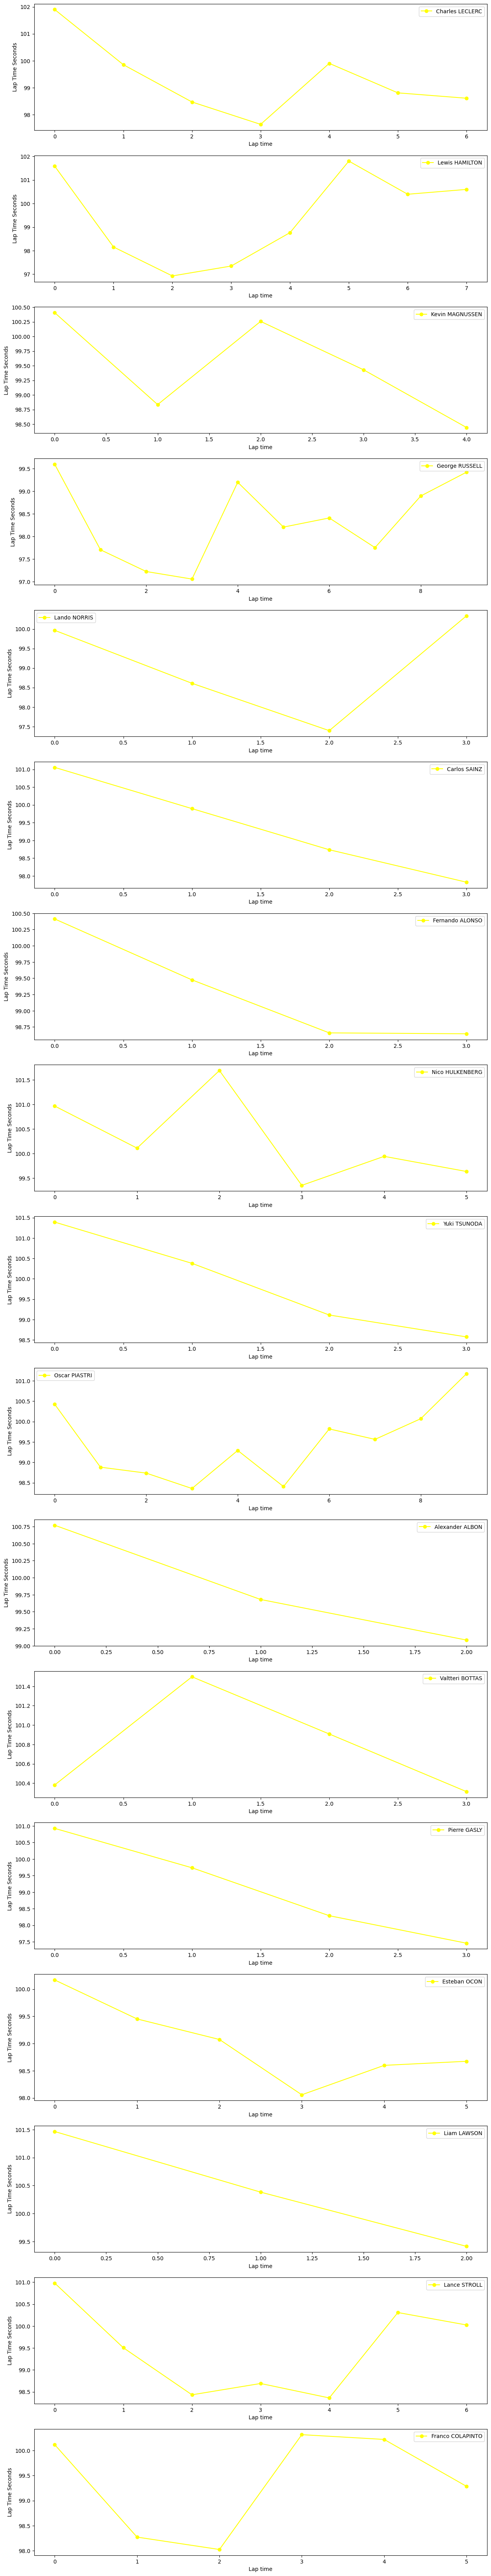

In [6]:
libraryDataF1.obtain_data_tyres(jointables2,"MEDIUM",102)

### Soft tyres

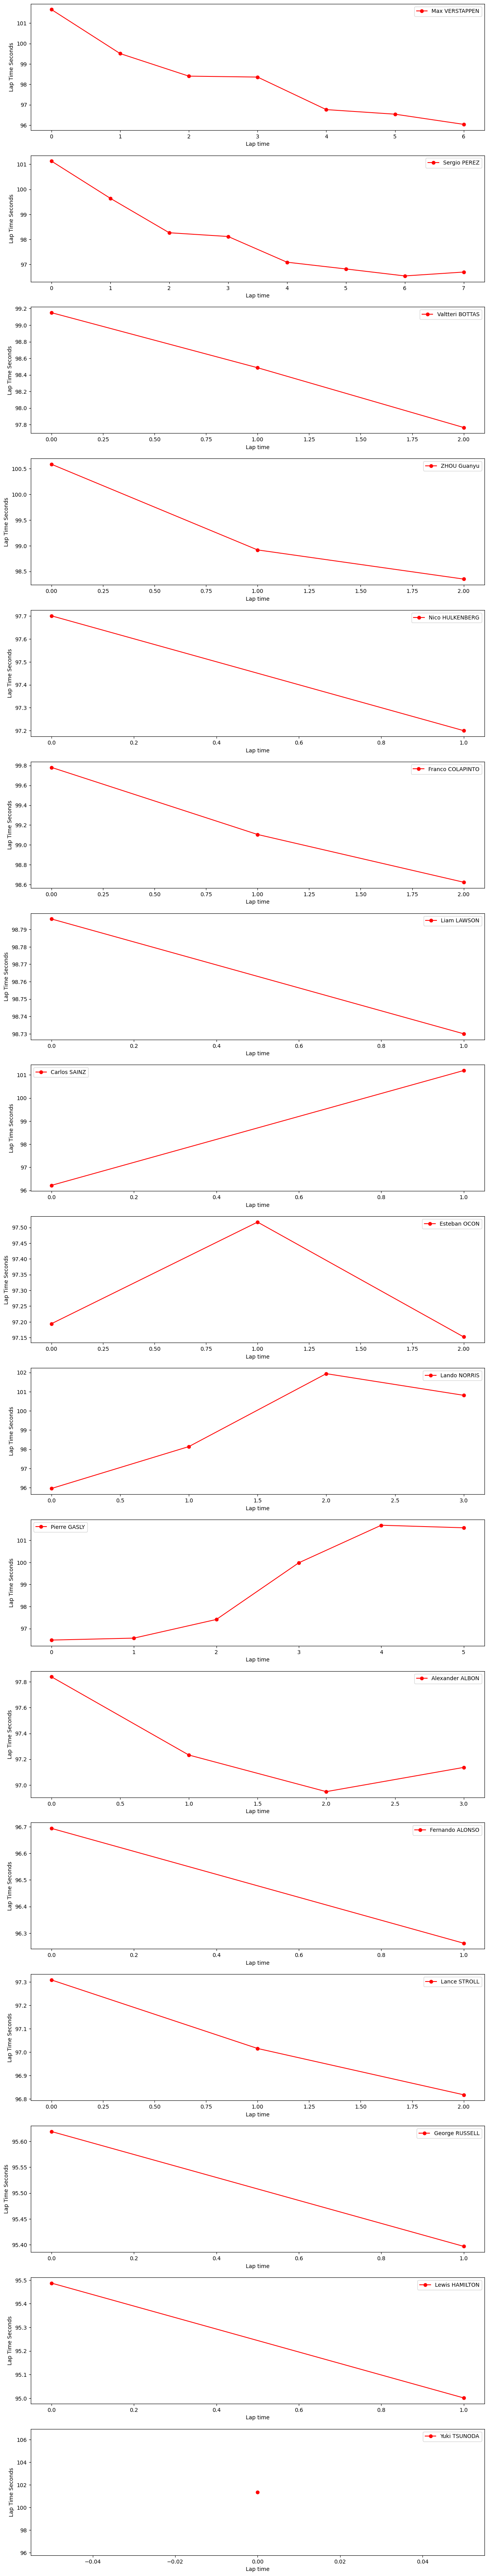

In [7]:
libraryDataF1.obtain_data_tyres(jointables2,"SOFT",102)

### Hard tyres

In [8]:
#libraryDataF1.obtain_data_tyres(jointables2,"HARD",102)

### Speed trap

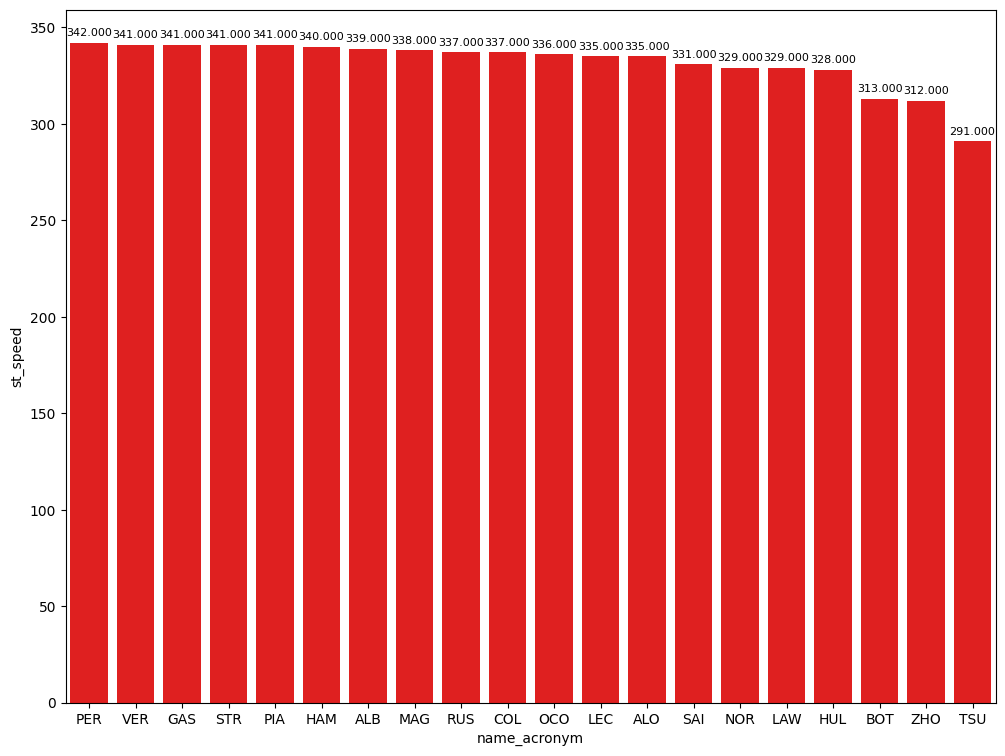

In [9]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

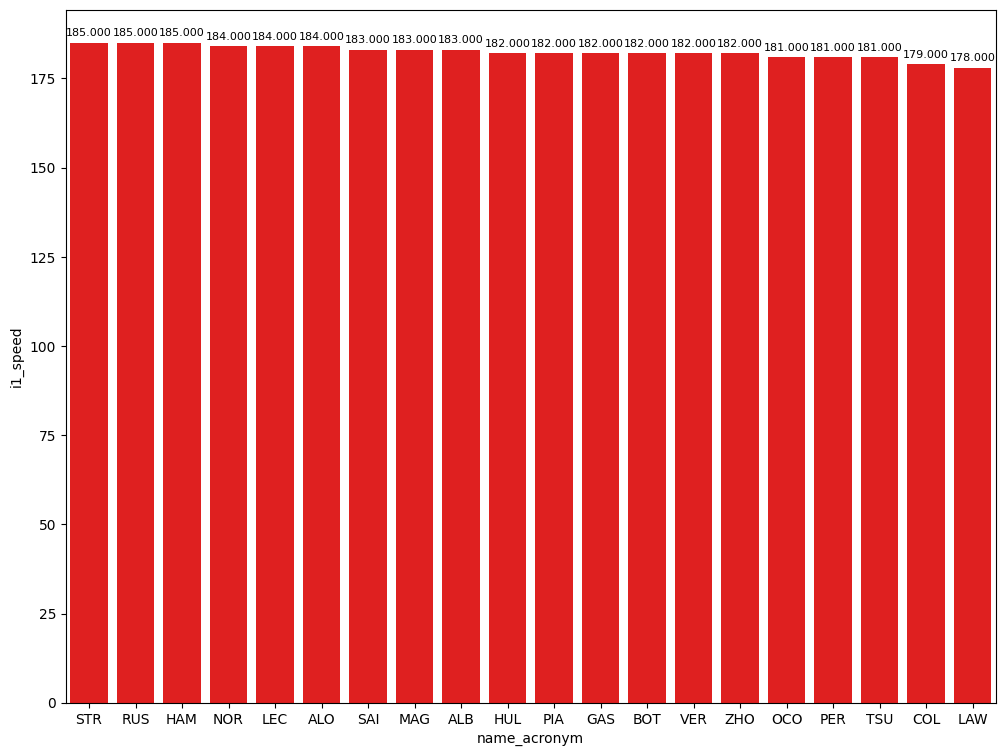

In [10]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

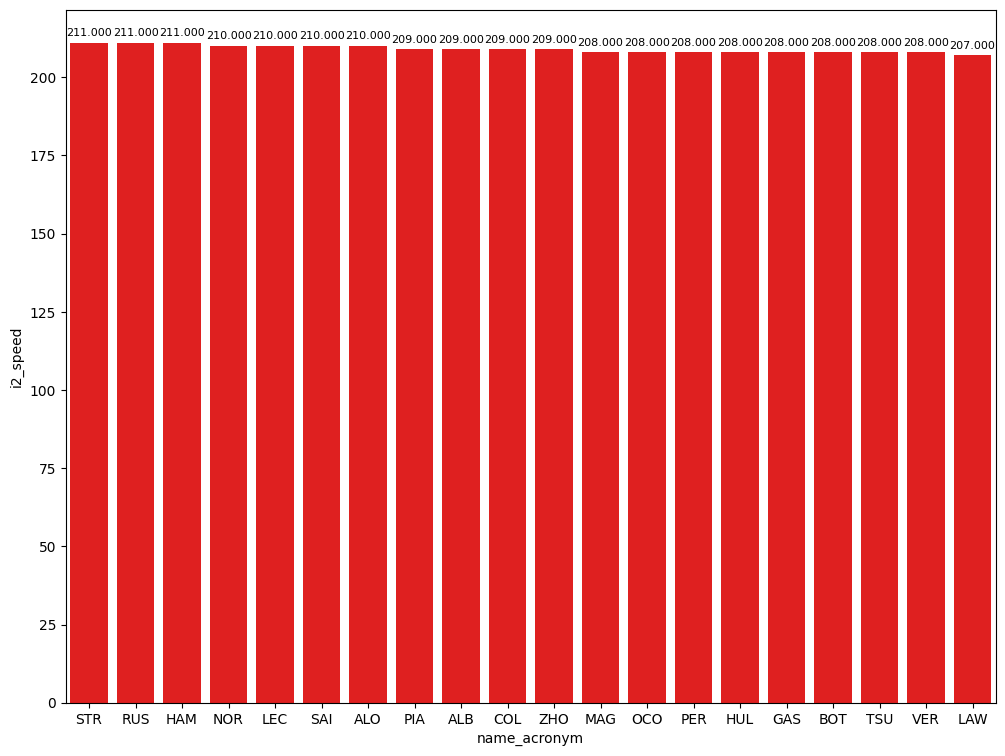

In [11]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Fastest lap per compound
In this section, I will show the best lap with the different compounds of the session. 

In [12]:
compoundsPace = jointables2.loc[jointables2.groupby(['compound'])['lap_duration'].idxmin()]
compoundsPace[['full_name','compound','duration_sector_1','duration_sector_2','duration_sector_3','lap_duration']]

,full_name,compound,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
140,Lewis HAMILTON,MEDIUM,27.358,32.549,37.020,96.927
464,Lewis HAMILTON,SOFT,26.784,31.811,36.406,95.001
328,Charles LECLERC,UNKNOWN,26.998,31.884,37.125,96.007


### Deltas
In this section we can see the deltas of the fastest lap of each driver compared with the fastest lap of the session.

In [13]:
practiceCleaned = jointables2.query("lap_duration >1")
drivers_list = list(practiceCleaned['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_fastest_lap(driver,practiceCleaned,newdataset)

arr= libraryDataF1.obtain_deltas(newdataset)
newdataset.insert(3,'delta',arr)


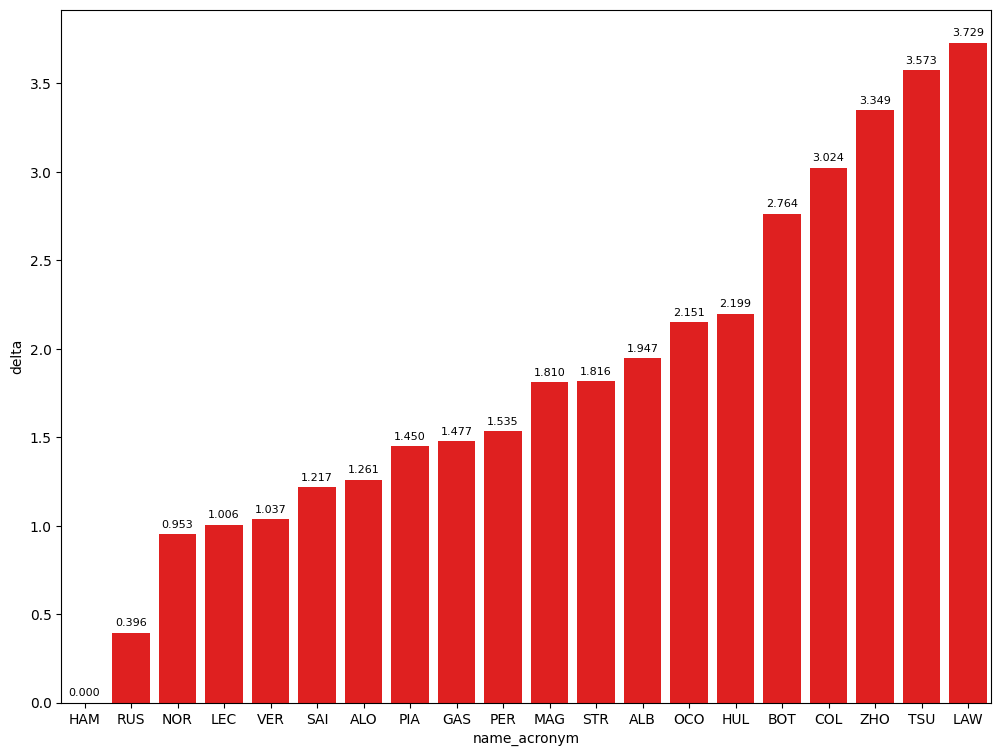

In [14]:
dt = newdataset.sort_values(ascending=True,by='delta')
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Track dominance
In this section, best sector are taken of each sector to see the car's performance in each sector. Also, each sector will be commented. As we can see in the free practice, these data  are not very representative due to the changing conditions.


In [15]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_1'].idxmin().dropna()].sort_values(by=['duration_sector_1'],ascending=True)
sectorPace[['duration_sector_1','full_name','compound','lap_duration','lap_number']]

,duration_sector_1,full_name,compound,lap_duration,lap_number
464,26.784,Lewis HAMILTON,SOFT,95.001,24
429,26.911,George RUSSELL,SOFT,95.397,26
367,26.917,Carlos SAINZ,SOFT,101.189,21
439,26.964,Max VERSTAPPEN,SOFT,96.038,22
328,26.998,Charles LECLERC,UNKNOWN,96.007,19
314,27.048,Oscar PIASTRI,UNKNOWN,96.451,14
420,27.063,Sergio PEREZ,SOFT,96.536,21
413,27.101,Fernando ALONSO,SOFT,96.262,21
369,27.102,Lando NORRIS,SOFT,98.137,19
266,27.224,Kevin MAGNUSSEN,UNKNOWN,97.892,13


In [16]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_2'].idxmin()].sort_values(by=['duration_sector_2'],ascending=True)
sectorPace[['duration_sector_2','full_name','compound','lap_duration','lap_number']]

,duration_sector_2,full_name,compound,lap_duration,lap_number
464,31.811,Lewis HAMILTON,SOFT,95.001,24
328,31.884,Charles LECLERC,UNKNOWN,96.007,19
393,31.926,George RUSSELL,SOFT,95.619,24
439,31.992,Max VERSTAPPEN,SOFT,96.038,22
302,32.012,Carlos SAINZ,SOFT,96.218,17
330,32.104,Lando NORRIS,SOFT,95.954,16
370,32.209,Pierre GASLY,SOFT,96.566,16
465,32.213,Lance STROLL,SOFT,96.817,23
413,32.279,Fernando ALONSO,SOFT,96.262,21
460,32.281,Sergio PEREZ,SOFT,96.691,23


In [17]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_3'].idxmin()].sort_values(by=['duration_sector_3'],ascending=True)
sectorPace[['duration_sector_3','full_name','compound','lap_duration','lap_number']]

,duration_sector_3,full_name,compound,lap_duration,lap_number
429,36.395,George RUSSELL,SOFT,95.397,26
464,36.406,Lewis HAMILTON,SOFT,95.001,24
330,36.709,Lando NORRIS,SOFT,95.954,16
343,36.861,Pierre GASLY,SOFT,96.478,14
413,36.882,Fernando ALONSO,SOFT,96.262,21
314,37.059,Oscar PIASTRI,UNKNOWN,96.451,14
439,37.082,Max VERSTAPPEN,SOFT,96.038,22
321,37.099,Esteban OCON,SOFT,97.194,14
409,37.111,Alexander ALBON,SOFT,96.948,21
420,37.124,Sergio PEREZ,SOFT,96.536,21


### Mean pace with the different compound used on the session

In [18]:
race_pace = pd.DataFrame(jointables2.query("is_pit_out_lap == False and lap_duration > 97 and lap_duration <=101").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

,lap_duration
compound,
UNKNOWN,98.051571
SOFT,98.352844
MEDIUM,99.233824


### Long runs

In [19]:
MINIMUN_SECONDS = 97
MAXIMUM_SECONDS = 101

#### Red Bull Racing

In [20]:
stintInformation.query('driver_number == 1 or driver_number == 11')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
16,1250,9637,1,1,1,15,SOFT,0
17,1250,9637,1,11,1,15,SOFT,0
49,1250,9637,2,1,16,26,SOFT,0
50,1250,9637,2,11,16,26,SOFT,0


In [21]:
libraryDataF1.getinfolongruns(jointables2,1,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
103,Max VERSTAPPEN,SOFT,2024-11-22T02:41:21.417000+00:00,6,28.061,33.444,38.002,99.507
189,Max VERSTAPPEN,SOFT,2024-11-22T02:51:15.306000+00:00,11,27.423,32.883,38.095,98.401
211,Max VERSTAPPEN,SOFT,2024-11-22T02:54:55.601000+00:00,13,27.358,33.119,37.879,98.356


In [22]:
libraryDataF1.getinfolongruns(jointables2,11,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
156,Sergio PEREZ,SOFT,2024-11-22T02:46:23.065000+00:00,9,28.221,33.363,38.056,99.640
182,Sergio PEREZ,SOFT,2024-11-22T02:50:05.304000+00:00,11,27.705,32.817,37.741,98.263
206,Sergio PEREZ,SOFT,2024-11-22T02:53:49.033000+00:00,13,27.612,33.000,37.501,98.113
347,Sergio PEREZ,SOFT,2024-11-22T03:15:47.175000+00:00,16,27.317,32.395,37.373,97.085


#### Ferrari

In [23]:
stintInformation.query('driver_number == 16 or driver_number == 55')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
12,1250,9637,1,16,1,13,MEDIUM,0
18,1250,9637,1,55,1,15,MEDIUM,0
41,1250,9637,2,16,14,13,UNKNOWN,0
42,1250,9637,3,16,14,22,UNKNOWN,0
47,1250,9637,2,55,16,22,SOFT,0
66,1250,9637,3,55,23,27,UNKNOWN,0
67,1250,9637,4,16,23,28,MEDIUM,0


In [24]:
libraryDataF1.getinfolongruns(jointables2,16,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
90,Charles LECLERC,MEDIUM,2024-11-22T02:40:05.784000+00:00,6,28.553,33.284,38.018,99.855
144,Charles LECLERC,MEDIUM,2024-11-22T02:45:19.622000+00:00,9,27.750,32.747,37.975,98.472
176,Charles LECLERC,MEDIUM,2024-11-22T02:49:05.159000+00:00,11,27.766,32.484,37.392,97.642
263,Charles LECLERC,UNKNOWN,2024-11-22T03:06:05.021000+00:00,15,27.503,32.254,37.255,97.012
431,Charles LECLERC,MEDIUM,2024-11-22T03:26:34.509000+00:00,23,28.445,33.369,38.090,99.904
450,Charles LECLERC,MEDIUM,2024-11-22T03:28:14.463000+00:00,24,28.010,32.702,38.098,98.810
469,Charles LECLERC,MEDIUM,2024-11-22T03:29:53.173000+00:00,25,27.775,33.063,37.773,98.611


In [25]:
libraryDataF1.getinfolongruns(jointables2,55,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
134,Carlos SAINZ,MEDIUM,2024-11-22T02:44:18.261000+00:00,8,28.161,33.262,38.472,99.895
165,Carlos SAINZ,MEDIUM,2024-11-22T02:47:59.710000+00:00,10,27.768,33.071,37.897,98.736
190,Carlos SAINZ,MEDIUM,2024-11-22T02:51:34.088000+00:00,12,27.662,32.527,37.632,97.821
433,Carlos SAINZ,UNKNOWN,2024-11-22T03:26:41.914000+00:00,23,28.286,33.652,38.309,100.247
452,Carlos SAINZ,UNKNOWN,2024-11-22T03:28:22.123000+00:00,24,27.872,33.032,37.993,98.897


#### Mercedes

In [26]:
stintInformation.query('driver_number == 44 or driver_number == 63')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
14,1250,9637,1,44,1,14,MEDIUM,0
15,1250,9637,1,63,1,14,MEDIUM,0
45,1250,9637,2,44,15,21,MEDIUM,0
46,1250,9637,2,63,15,22,MEDIUM,0
65,1250,9637,3,44,22,27,SOFT,0
68,1250,9637,3,63,23,30,SOFT,0


In [27]:
libraryDataF1.getinfolongruns(jointables2,44,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
102,Lewis HAMILTON,MEDIUM,2024-11-22T02:41:08.726000+00:00,6,28.037,32.807,37.311,98.155
195,Lewis HAMILTON,MEDIUM,2024-11-22T02:52:03.499000+00:00,12,27.377,32.552,37.418,97.347
267,Lewis HAMILTON,MEDIUM,2024-11-22T03:06:30.688000+00:00,15,27.972,32.860,37.933,98.765
309,Lewis HAMILTON,MEDIUM,2024-11-22T03:11:41.674000+00:00,18,28.585,33.803,38.005,100.393
324,Lewis HAMILTON,MEDIUM,2024-11-22T03:13:22.061000+00:00,19,28.303,34.178,38.118,100.599


In [28]:
libraryDataF1.getinfolongruns(jointables2,63,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
83,George RUSSELL,MEDIUM,2024-11-22T02:39:18.480000+00:00,5,28.538,33.682,37.375,99.595
139,George RUSSELL,MEDIUM,2024-11-22T02:44:40.336000+00:00,8,27.530,33.144,37.032,97.706
172,George RUSSELL,MEDIUM,2024-11-22T02:48:31.067000+00:00,10,27.463,32.870,36.893,97.226
197,George RUSSELL,MEDIUM,2024-11-22T02:52:18.094000+00:00,12,27.387,32.710,36.962,97.059
272,George RUSSELL,MEDIUM,2024-11-22T03:06:55.813000+00:00,15,28.398,33.262,37.537,99.197
285,George RUSSELL,MEDIUM,2024-11-22T03:08:34.898000+00:00,16,27.816,32.956,37.435,98.207
298,George RUSSELL,MEDIUM,2024-11-22T03:10:13.187000+00:00,17,27.948,32.987,37.474,98.409
312,George RUSSELL,MEDIUM,2024-11-22T03:11:51.633000+00:00,18,27.732,33.040,36.982,97.754
326,George RUSSELL,MEDIUM,2024-11-22T03:13:29.404000+00:00,19,28.187,33.056,37.651,98.894
341,George RUSSELL,MEDIUM,2024-11-22T03:15:08.188000+00:00,20,28.167,33.747,37.506,99.420


#### McLaren

In [29]:
stintInformation.query('driver_number == 81 or driver_number == 4')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
2,1250,9637,1,81,1,2,MEDIUM,0
8,1250,9637,1,4,1,10,MEDIUM,0
20,1250,9637,2,81,3,3,MEDIUM,0
23,1250,9637,3,81,4,11,MEDIUM,0
31,1250,9637,2,4,11,15,MEDIUM,0
35,1250,9637,4,81,12,11,UNKNOWN,0
36,1250,9637,5,81,12,18,UNKNOWN,0
48,1250,9637,3,4,16,23,SOFT,0
57,1250,9637,6,81,19,18,SOFT,0
60,1250,9637,7,81,19,27,MEDIUM,0


In [30]:
libraryDataF1.getinfolongruns(jointables2,4,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
91,Lando NORRIS,MEDIUM,2024-11-22T02:40:10.468000+00:00,6,28.395,33.648,37.923,99.966
130,Lando NORRIS,MEDIUM,2024-11-22T02:43:49.853000+00:00,8,28.084,33.145,37.380,98.609
225,Lando NORRIS,MEDIUM,2024-11-22T02:58:56.233000+00:00,11,27.548,32.504,37.344,97.396
369,Lando NORRIS,SOFT,2024-11-22T03:19:10.412000+00:00,19,27.102,32.356,38.679,98.137
392,Lando NORRIS,SOFT,2024-11-22T03:22:30.498000+00:00,21,28.369,33.632,38.807,100.808
448,Lando NORRIS,MEDIUM,2024-11-22T03:28:01.677000+00:00,24,28.334,34.247,37.757,100.338


In [31]:
libraryDataF1.getinfolongruns(jointables2,81,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
124,Oscar PIASTRI,MEDIUM,2024-11-22T02:43:14.400000+00:00,5,28.661,34.032,37.730,100.423
141,Oscar PIASTRI,MEDIUM,2024-11-22T02:44:54.899000+00:00,6,28.108,33.270,37.504,98.882
158,Oscar PIASTRI,MEDIUM,2024-11-22T02:46:33.783000+00:00,7,27.892,33.393,37.452,98.737
185,Oscar PIASTRI,MEDIUM,2024-11-22T02:50:26.133000+00:00,9,27.764,33.311,37.285,98.360
284,Oscar PIASTRI,UNKNOWN,2024-11-22T03:08:27.228000+00:00,12,27.234,32.730,37.974,97.938
348,Oscar PIASTRI,UNKNOWN,2024-11-22T03:15:58.419000+00:00,16,27.172,32.576,37.357,97.105
385,Oscar PIASTRI,MEDIUM,2024-11-22T03:21:38.815000+00:00,19,27.852,33.991,37.449,99.292
398,Oscar PIASTRI,MEDIUM,2024-11-22T03:23:18.049000+00:00,20,27.717,33.165,37.525,98.407
414,Oscar PIASTRI,MEDIUM,2024-11-22T03:24:56.577000+00:00,21,28.466,33.874,37.479,99.819
432,Oscar PIASTRI,MEDIUM,2024-11-22T03:26:36.263000+00:00,22,28.387,33.754,37.422,99.563


#### Aston Martin

In [32]:
stintInformation.query('driver_number == 18 or driver_number == 14')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
4,1250,9637,1,14,1,7,MEDIUM,0
5,1250,9637,1,18,1,7,MEDIUM,0
25,1250,9637,2,14,8,17,MEDIUM,6
26,1250,9637,2,18,8,17,MEDIUM,6
55,1250,9637,3,14,18,26,SOFT,0
56,1250,9637,3,18,18,26,SOFT,0


In [33]:
libraryDataF1.getinfolongruns(jointables2,14,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
97,Fernando ALONSO,MEDIUM,2024-11-22T02:40:38.854000+00:00,5,28.532,33.779,38.102,100.413
199,Fernando ALONSO,MEDIUM,2024-11-22T02:52:49.040000+00:00,8,28.155,33.618,37.702,99.475
218,Fernando ALONSO,MEDIUM,2024-11-22T02:56:18.998000+00:00,10,27.765,33.129,37.765,98.659
236,Fernando ALONSO,MEDIUM,2024-11-22T03:01:38.028000+00:00,13,27.838,33.064,37.743,98.645


In [34]:
libraryDataF1.getinfolongruns(jointables2,18,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
216,Lance STROLL,MEDIUM,2024-11-22T02:56:03.239000+00:00,8,29.393,33.522,38.065,100.980
223,Lance STROLL,MEDIUM,2024-11-22T02:57:44.168000+00:00,9,28.731,33.121,37.654,99.506
227,Lance STROLL,MEDIUM,2024-11-22T02:59:23.623000+00:00,10,28.033,32.821,37.579,98.433
234,Lance STROLL,MEDIUM,2024-11-22T03:01:02.070000+00:00,11,28.279,32.953,37.459,98.691
242,Lance STROLL,MEDIUM,2024-11-22T03:02:40.909000+00:00,12,27.894,32.919,37.549,98.362
264,Lance STROLL,MEDIUM,2024-11-22T03:06:07.259000+00:00,14,28.855,33.371,38.083,100.309
278,Lance STROLL,MEDIUM,2024-11-22T03:07:47.612000+00:00,15,28.635,33.325,38.065,100.025
389,Lance STROLL,SOFT,2024-11-22T03:22:10.535000+00:00,19,27.820,32.358,37.130,97.308
425,Lance STROLL,SOFT,2024-11-22T03:26:02.429000+00:00,21,27.348,32.346,37.321,97.015


#### RB

In [35]:
stintInformation.query('driver_number == 30 or driver_number == 22')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
13,1250,9637,1,22,1,14,MEDIUM,0
19,1250,9637,1,30,1,16,MEDIUM,0
43,1250,9637,2,22,15,14,UNKNOWN,0
44,1250,9637,3,22,15,20,MEDIUM,0
52,1250,9637,2,30,17,23,SOFT,0
61,1250,9637,4,22,21,24,SOFT,0
70,1250,9637,3,30,24,29,MEDIUM,0


In [36]:
libraryDataF1.getinfolongruns(jointables2,30,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
191,Liam LAWSON,MEDIUM,2024-11-22T02:51:39.221000+00:00,12,28.719,33.705,37.958,100.382
214,Liam LAWSON,MEDIUM,2024-11-22T02:55:22.191000+00:00,14,28.378,33.092,37.942,99.412
276,Liam LAWSON,SOFT,2024-11-22T03:07:31.917000+00:00,17,28.068,32.750,37.978,98.796
342,Liam LAWSON,SOFT,2024-11-22T03:15:14.751000+00:00,21,27.796,33.127,37.807,98.730


In [37]:
libraryDataF1.getinfolongruns(jointables2,22,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
167,Yuki TSUNODA,MEDIUM,2024-11-22T02:48:05.505000+00:00,10,28.984,33.339,38.057,100.380
194,Yuki TSUNODA,MEDIUM,2024-11-22T02:51:55.021000+00:00,12,28.213,32.972,37.927,99.112
273,Yuki TSUNODA,MEDIUM,2024-11-22T03:07:08.876000+00:00,16,28.097,32.842,37.635,98.574


#### Haas

In [38]:
stintInformation.query('driver_number == 20 or driver_number == 27')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
3,1250,9637,1,20,1,6,MEDIUM,0
7,1250,9637,1,27,1,9,MEDIUM,0
24,1250,9637,2,20,7,9,MEDIUM,0
27,1250,9637,3,20,10,10,UNKNOWN,0
28,1250,9637,2,27,10,10,MEDIUM,8
33,1250,9637,3,27,11,17,SOFT,0
34,1250,9637,4,20,11,18,UNKNOWN,0
53,1250,9637,4,27,18,17,UNKNOWN,0
54,1250,9637,5,27,18,25,MEDIUM,0
59,1250,9637,5,20,19,25,MEDIUM,0


In [39]:
libraryDataF1.getinfolongruns(jointables2,20,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
71,Kevin MAGNUSSEN,MEDIUM,2024-11-22T02:38:09.435000+00:00,5,28.957,33.354,38.096,100.407
138,Kevin MAGNUSSEN,MEDIUM,2024-11-22T02:44:34.168000+00:00,8,28.447,32.924,37.464,98.835
238,Kevin MAGNUSSEN,UNKNOWN,2024-11-22T03:02:14.310000+00:00,11,27.352,32.535,37.383,97.270
266,Kevin MAGNUSSEN,UNKNOWN,2024-11-22T03:06:23.059000+00:00,13,27.224,32.672,37.996,97.892
401,Kevin MAGNUSSEN,MEDIUM,2024-11-22T03:23:35.803000+00:00,19,28.718,33.512,38.028,100.258
419,Kevin MAGNUSSEN,MEDIUM,2024-11-22T03:25:15.989000+00:00,20,28.341,33.198,37.891,99.430
437,Kevin MAGNUSSEN,MEDIUM,2024-11-22T03:26:55.442000+00:00,21,28.025,32.898,37.520,98.443


In [40]:
libraryDataF1.getinfolongruns(jointables2,27,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
100,Nico HULKENBERG,MEDIUM,2024-11-22T02:40:52.047000+00:00,5,28.565,34.339,38.062,100.966
137,Nico HULKENBERG,MEDIUM,2024-11-22T02:44:30.556000+00:00,7,28.529,33.835,37.746,100.110
251,Nico HULKENBERG,SOFT,2024-11-22T03:04:17.458000+00:00,12,27.502,32.768,37.431,97.701
279,Nico HULKENBERG,SOFT,2024-11-22T03:07:57.868000+00:00,14,27.385,32.595,37.220,97.200
421,Nico HULKENBERG,MEDIUM,2024-11-22T03:25:37.217000+00:00,20,28.273,33.233,37.847,99.353
440,Nico HULKENBERG,MEDIUM,2024-11-22T03:27:16.477000+00:00,21,28.226,33.868,37.849,99.943
459,Nico HULKENBERG,MEDIUM,2024-11-22T03:28:56.373000+00:00,22,28.371,33.483,37.781,99.635


#### Alpine

In [41]:
stintInformation.query('driver_number == 31 or driver_number == 10')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
0,1250,9637,1,10,1,2,MEDIUM,0
1,1250,9637,1,31,1,2,MEDIUM,0
21,1250,9637,2,10,3,12,MEDIUM,1
22,1250,9637,2,31,3,12,MEDIUM,1
39,1250,9637,3,31,13,20,SOFT,0
40,1250,9637,3,10,13,25,SOFT,0
62,1250,9637,4,31,21,26,MEDIUM,0


In [42]:
libraryDataF1.getinfolongruns(jointables2,31,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
148,Esteban OCON,MEDIUM,2024-11-22T02:45:50.166000+00:00,5,28.615,33.477,38.078,100.170
163,Esteban OCON,MEDIUM,2024-11-22T02:47:30.373000+00:00,6,28.184,33.425,37.844,99.453
187,Esteban OCON,MEDIUM,2024-11-22T02:51:01.137000+00:00,8,28.131,33.176,37.768,99.075
209,Esteban OCON,MEDIUM,2024-11-22T02:54:26.805000+00:00,10,27.879,32.843,37.336,98.058
321,Esteban OCON,SOFT,2024-11-22T03:12:52.386000+00:00,14,27.492,32.603,37.099,97.194
350,Esteban OCON,SOFT,2024-11-22T03:16:25.286000+00:00,16,27.409,32.750,37.358,97.517
373,Esteban OCON,SOFT,2024-11-22T03:19:51.859000+00:00,18,27.463,32.571,37.118,97.152
423,Esteban OCON,MEDIUM,2024-11-22T03:25:47.278000+00:00,21,28.284,32.664,37.651,98.599
461,Esteban OCON,MEDIUM,2024-11-22T03:29:10.265000+00:00,23,28.179,32.928,37.567,98.674


In [43]:
libraryDataF1.getinfolongruns(jointables2,10,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
135,Pierre GASLY,MEDIUM,2024-11-22T02:44:19.199000+00:00,4,29.050,34.033,37.843,100.926
168,Pierre GASLY,MEDIUM,2024-11-22T02:48:09.230000+00:00,6,28.984,33.330,37.422,99.736
192,Pierre GASLY,MEDIUM,2024-11-22T02:51:42.874000+00:00,8,28.055,33.080,37.154,98.289
213,Pierre GASLY,MEDIUM,2024-11-22T02:55:15.663000+00:00,10,27.652,32.694,37.112,97.458
395,Pierre GASLY,SOFT,2024-11-22T03:23:00.877000+00:00,18,27.412,32.706,37.294,97.412
410,Pierre GASLY,SOFT,2024-11-22T03:24:38.193000+00:00,19,28.142,33.602,38.239,99.983


#### Williams

In [44]:
stintInformation.query('driver_number == 43 or driver_number == 23')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
9,1250,9637,1,23,1,10,MEDIUM,0
10,1250,9637,1,43,1,10,MEDIUM,0
30,1250,9637,2,43,11,11,MEDIUM,9
32,1250,9637,2,23,11,15,MEDIUM,0
37,1250,9637,3,43,12,20,SOFT,0
51,1250,9637,3,23,16,27,SOFT,0
64,1250,9637,4,43,21,29,MEDIUM,0


In [45]:
libraryDataF1.getinfolongruns(jointables2,23,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
125,Alexander ALBON,MEDIUM,2024-11-22T02:43:19.961000+00:00,6,28.690,33.845,38.235,100.770
280,Alexander ALBON,MEDIUM,2024-11-22T03:08:00.728000+00:00,12,28.184,33.591,37.905,99.680
294,Alexander ALBON,MEDIUM,2024-11-22T03:09:40.373000+00:00,13,28.052,33.337,37.695,99.084
356,Alexander ALBON,SOFT,2024-11-22T03:17:10.690000+00:00,17,27.502,32.801,37.536,97.839
378,Alexander ALBON,SOFT,2024-11-22T03:20:46.431000+00:00,19,27.254,32.815,37.163,97.232
449,Alexander ALBON,SOFT,2024-11-22T03:28:11.868000+00:00,23,27.244,32.629,37.263,97.136


In [46]:
libraryDataF1.getinfolongruns(jointables2,43,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
256,Franco COLAPINTO,SOFT,2024-11-22T03:04:58.293000+00:00,13,28.434,33.362,37.985,99.781
286,Franco COLAPINTO,SOFT,2024-11-22T03:08:41.468000+00:00,15,27.921,33.344,37.840,99.105
316,Franco COLAPINTO,SOFT,2024-11-22T03:12:29.347000+00:00,17,27.897,33.210,37.517,98.624
375,Franco COLAPINTO,MEDIUM,2024-11-22T03:20:05.714000+00:00,21,28.617,33.465,38.033,100.115
386,Franco COLAPINTO,MEDIUM,2024-11-22T03:21:45.890000+00:00,22,28.140,32.646,37.486,98.272
399,Franco COLAPINTO,MEDIUM,2024-11-22T03:23:24.076000+00:00,23,27.916,32.555,37.554,98.025
417,Franco COLAPINTO,MEDIUM,2024-11-22T03:25:02.015000+00:00,24,28.541,34.214,37.559,100.314
434,Franco COLAPINTO,MEDIUM,2024-11-22T03:26:42.535000+00:00,25,28.972,33.417,37.830,100.219
453,Franco COLAPINTO,MEDIUM,2024-11-22T03:28:22.815000+00:00,26,28.294,33.277,37.713,99.284


#### Kick Sauber

In [47]:
stintInformation.query('driver_number == 24 or driver_number == 77')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
6,1250,9637,1,24,1,9,MEDIUM,0
11,1250,9637,1,77,1,11,MEDIUM,0
29,1250,9637,2,24,10,18,SOFT,0
38,1250,9637,2,77,12,20,SOFT,0
58,1250,9637,3,24,19,24,SOFT,0
63,1250,9637,3,77,21,26,MEDIUM,0


In [48]:
libraryDataF1.getinfolongruns(jointables2,24,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
243,ZHOU Guanyu,SOFT,2024-11-22T03:02:55.056000+00:00,11,28.566,33.619,38.402,100.587
268,ZHOU Guanyu,SOFT,2024-11-22T03:06:36.894000+00:00,13,28.073,33.074,37.771,98.918
301,ZHOU Guanyu,SOFT,2024-11-22T03:10:33.299000+00:00,15,27.630,33.068,37.652,98.350


In [49]:
libraryDataF1.getinfolongruns(jointables2,77,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
128,Valtteri BOTTAS,MEDIUM,2024-11-22T02:43:41.623000+00:00,8,28.650,33.899,37.833,100.382
237,Valtteri BOTTAS,SOFT,2024-11-22T03:01:57.908000+00:00,12,28.028,33.278,37.844,99.150
260,Valtteri BOTTAS,SOFT,2024-11-22T03:05:31.830000+00:00,14,27.690,33.167,37.629,98.486
303,Valtteri BOTTAS,SOFT,2024-11-22T03:10:57.936000+00:00,17,27.562,32.864,37.339,97.765
443,Valtteri BOTTAS,MEDIUM,2024-11-22T03:27:32.405000+00:00,22,28.869,33.634,38.405,100.908
462,Valtteri BOTTAS,MEDIUM,2024-11-22T03:29:13.293000+00:00,23,28.704,33.603,38.006,100.313


#### Long runs mean for each driver

In [50]:
longrun_data = libraryDataF1.obtainLongRunData(drivers,jointables2,MINIMUN_SECONDS,MAXIMUM_SECONDS)

##### Sorted by lap duration

In [51]:
pd.DataFrame(longrun_data,columns=['driver','compound','lap_duration','sector1','sector2','sector3']).sort_values(by='lap_duration',ascending=True)

,driver,compound,lap_duration,sector1,sector2,sector3
3,Sergio PEREZ,SOFT,98.275250,27.713750,32.893750,37.667750
17,George RUSSELL,MEDIUM,98.346700,27.916600,33.145400,37.284700
13,Esteban OCON,MEDIUM,98.432444,27.959556,32.937444,37.535444
5,Charles LECLERC,MEDIUM,98.615143,27.971714,32.843286,37.800143
9,Alexander ALBON,MEDIUM,98.623500,27.821000,33.169667,37.632833
0,Max VERSTAPPEN,SOFT,98.754667,27.614000,33.148667,37.992000
7,Kevin MAGNUSSEN,MEDIUM,98.933571,28.152000,33.013286,37.768286
6,Lance STROLL,MEDIUM,98.958778,28.332000,32.970667,37.656111
19,Oscar PIASTRI,MEDIUM,98.963182,28.007545,33.440727,37.514909
2,Pierre GASLY,MEDIUM,98.967333,28.215833,33.240833,37.510667


##### Sorted by sector 1


In [57]:
pd.DataFrame(longrun_data,columns=['driver','compound','lap_duration','sector1','sector2','sector3']).sort_values(by='sector1',ascending=True)[['driver','compound','sector1']]

,driver,compound,sector1
0,Max VERSTAPPEN,SOFT,27.614000
3,Sergio PEREZ,SOFT,27.713750
9,Alexander ALBON,MEDIUM,27.821000
17,George RUSSELL,MEDIUM,27.916600
16,Carlos SAINZ,MEDIUM,27.949800
13,Esteban OCON,MEDIUM,27.959556
5,Charles LECLERC,MEDIUM,27.971714
1,Lando NORRIS,MEDIUM,27.972000
19,Oscar PIASTRI,MEDIUM,28.007545
15,Lewis HAMILTON,MEDIUM,28.054800


##### Sorted by sector 2


In [58]:
pd.DataFrame(longrun_data,columns=['driver','compound','lap_duration','sector1','sector2','sector3']).sort_values(by='sector2',ascending=True)[['driver','compound','sector2']]

,driver,compound,sector2
5,Charles LECLERC,MEDIUM,32.843286
3,Sergio PEREZ,SOFT,32.893750
13,Esteban OCON,MEDIUM,32.937444
6,Lance STROLL,MEDIUM,32.970667
7,Kevin MAGNUSSEN,MEDIUM,33.013286
8,Yuki TSUNODA,MEDIUM,33.051000
16,Carlos SAINZ,MEDIUM,33.108800
17,George RUSSELL,MEDIUM,33.145400
0,Max VERSTAPPEN,SOFT,33.148667
12,Liam LAWSON,MEDIUM,33.168500


##### Sorted by sector 3

In [59]:
pd.DataFrame(longrun_data,columns=['driver','compound','lap_duration','sector1','sector2','sector3']).sort_values(by='sector3',ascending=True)[['driver','compound','sector3']]

,driver,compound,sector3
17,George RUSSELL,MEDIUM,37.284700
2,Pierre GASLY,MEDIUM,37.510667
19,Oscar PIASTRI,MEDIUM,37.514909
13,Esteban OCON,MEDIUM,37.535444
9,Alexander ALBON,MEDIUM,37.632833
6,Lance STROLL,MEDIUM,37.656111
3,Sergio PEREZ,SOFT,37.667750
11,Nico HULKENBERG,MEDIUM,37.705143
14,Franco COLAPINTO,MEDIUM,37.724111
15,Lewis HAMILTON,MEDIUM,37.757000


## Free Practice 2
### Obtain setup

In [3]:
practice = libraryDataF1.obtain_information('laps',session_key=9638)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9638)
drivers = libraryDataF1.obtain_information('drivers',session_key=9638)

In [5]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointables2 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])
jointables2

,meeting_key,session_key,driver_number,i1_speed,i2_speed,st_speed,date_start,lap_duration,is_pit_out_lap,duration_sector_1,duration_sector_2,duration_sector_3,segments_sector_1,segments_sector_2,segments_sector_3,lap_number,compound,name_acronym,full_name,team_name
0,1250,9638,10,147.0,184.0,277.0,2024-11-22T06:00:20.911000+00:00,NaN,True,NaN,38.232,39.282,"[2064, 2064, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049]","[2048, 2048, 2048, 2048, 2048, 2049, 2048, 0]",1,MEDIUM,GAS,Pierre GASLY,Alpine
1,1250,9638,31,144.0,181.0,285.0,2024-11-22T06:00:23.944000+00:00,NaN,True,NaN,38.045,38.810,"[2064, 2064, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2051, 2049]","[2048, 2048, 2048, 2048, 2048, 2049, 2048, 2048]",1,MEDIUM,OCO,Esteban OCON,Alpine
2,1250,9638,77,162.0,192.0,244.0,2024-11-22T06:00:29.287000+00:00,NaN,True,NaN,37.167,42.348,"[2064, 2064, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2051, 2051, 2049, 2049]","[2051, 2049, 2051, 2051, 2051, 2051, 2051, 0]",1,MEDIUM,BOT,Valtteri BOTTAS,Kick Sauber
3,1250,9638,43,129.0,183.0,280.0,2024-11-22T06:00:41.325000+00:00,NaN,True,NaN,40.685,40.824,"[2064, 2064, 2049, 2049, 2051, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 2049]",1,MEDIUM,COL,Franco COLAPINTO,Williams
4,1250,9638,24,149.0,186.0,194.0,2024-11-22T06:00:48.754000+00:00,NaN,True,NaN,41.324,45.013,"[2064, 2064, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049, 2049]",1,UNKNOWN,ZHO,ZHOU Guanyu,Kick Sauber
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,1250,9638,44,158.0,159.0,249.0,2024-11-22T07:03:51.468000+00:00,154.716,False,61.438,42.216,51.062,"[None, 2048, 2048, 2048, 2048, 2048]","[2048, 2048, 2048, 2048, 2048, 2048, 2048]",[],25,SOFT,HAM,Lewis HAMILTON,Mercedes
503,1250,9638,31,167.0,201.0,243.0,2024-11-22T07:03:52.613000+00:00,116.100,False,32.323,35.007,48.770,"[None, 2048, 2048, 2048, 2048, 2048]","[2048, 2048, 2048, 2048, 2048, 2048, 2048]",[],26,MEDIUM,OCO,Esteban OCON,Alpine
504,1250,9638,77,171.0,181.0,207.0,2024-11-22T07:03:55.198000+00:00,139.576,False,49.245,39.441,50.890,"[None, 2048, 2048, 2048, 2048, 2048]","[2048, 2048, 2048, 2048, 2048, 2048, 2048]",[],28,MEDIUM,BOT,Valtteri BOTTAS,Kick Sauber
505,1250,9638,63,144.0,159.0,119.0,2024-11-22T07:03:59.442000+00:00,173.721,False,70.032,42.892,60.797,"[None, 2048, 2048, 2048, 2048, 2048]","[2048, 2048, 2048, 2048, 2048, 2048, 2048]",[],29,MEDIUM,RUS,George RUSSELL,Mercedes


### See race pace by means of the charts

### Medium tyres

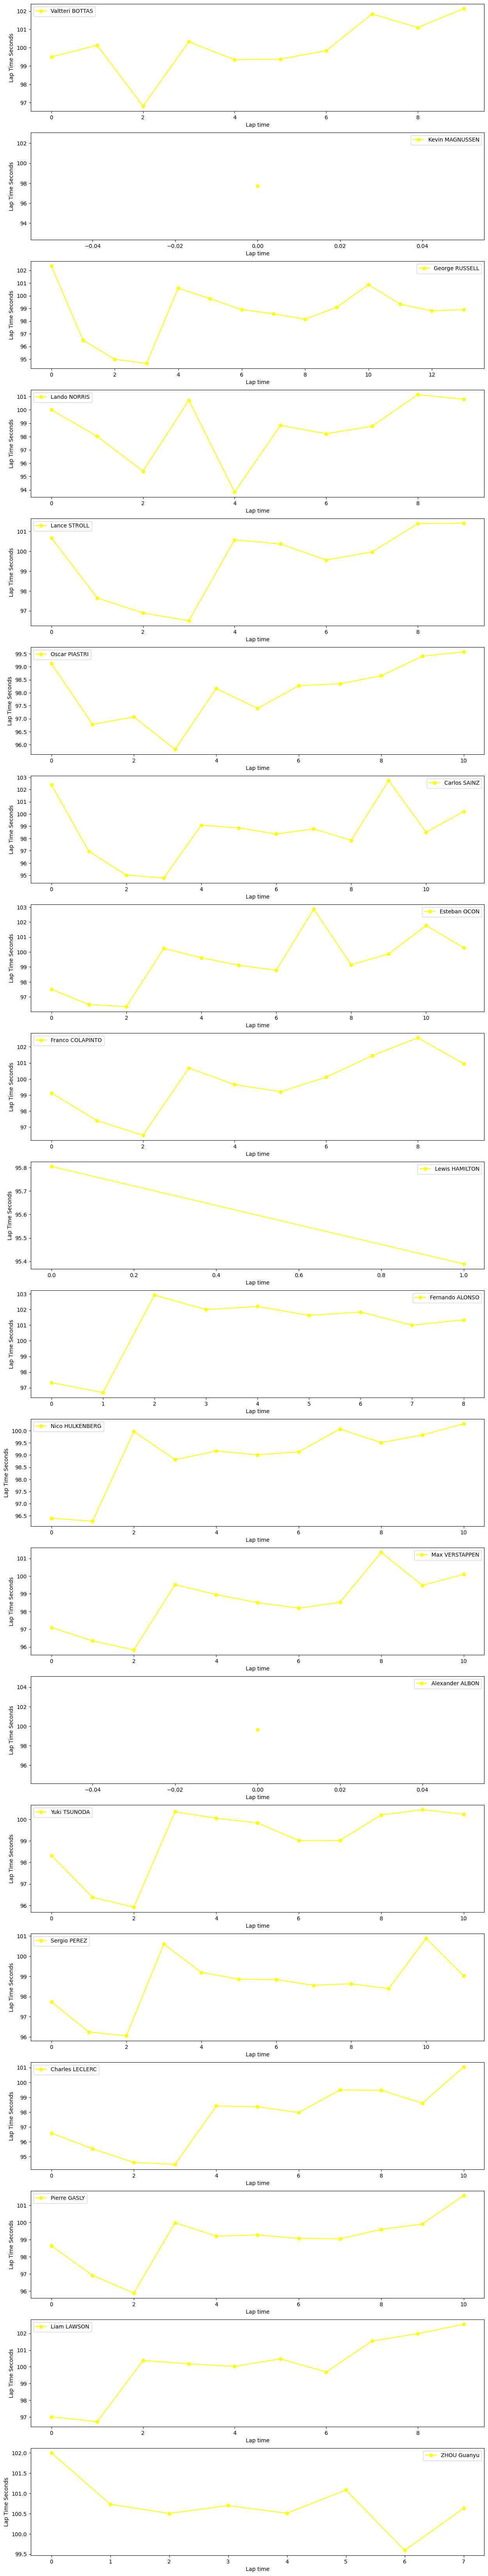

In [6]:
libraryDataF1.obtain_data_tyres(jointables2,"MEDIUM",103)

### Soft tyres

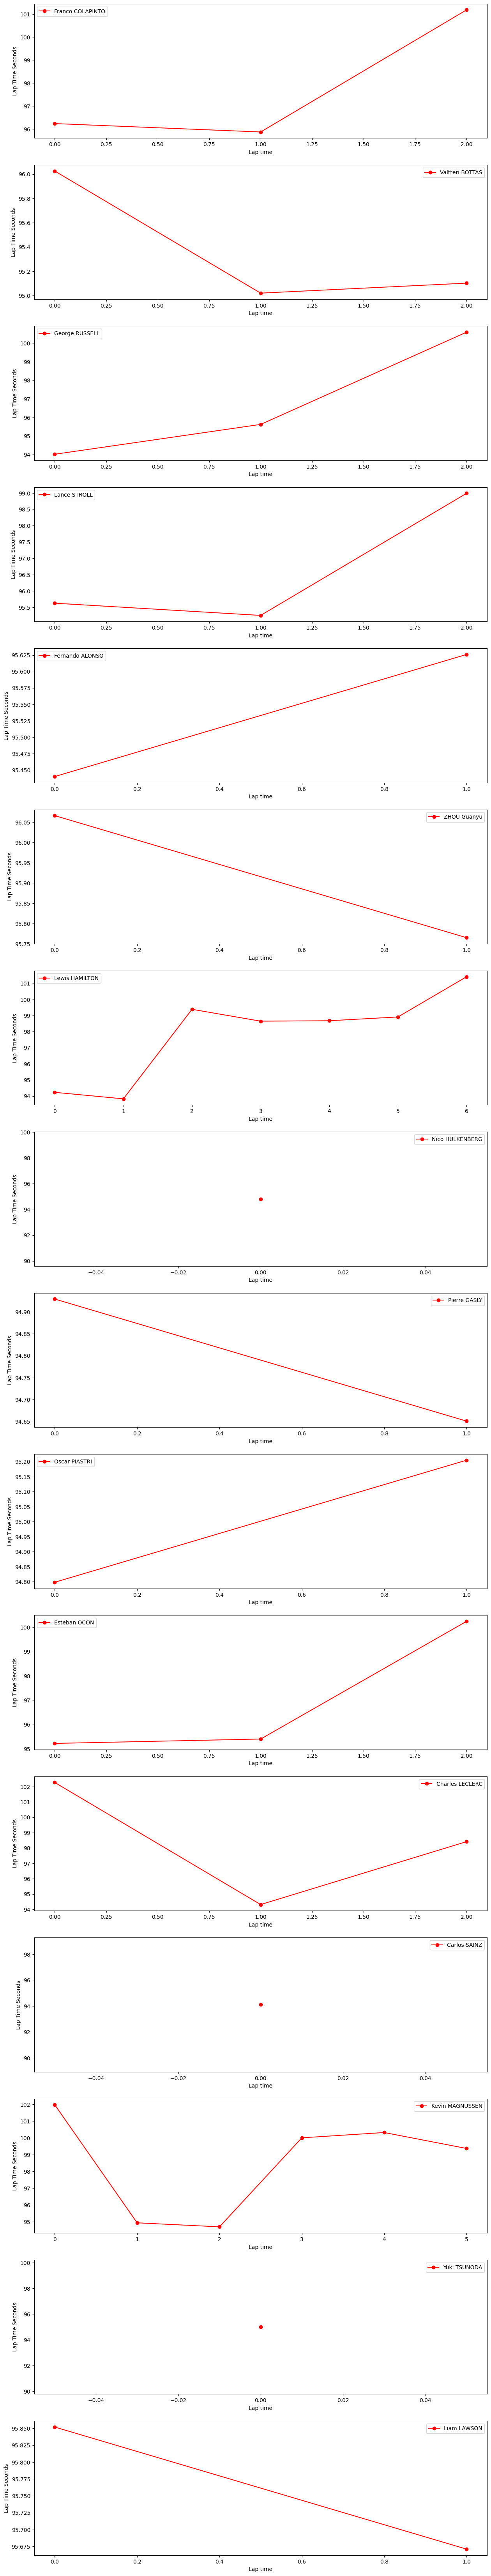

In [7]:
libraryDataF1.obtain_data_tyres(jointables2,"SOFT",103)

### Hard tyres

In [8]:
#libraryDataF1.obtain_data_tyres(jointables2,"HARD",100.3)

### Speed trap

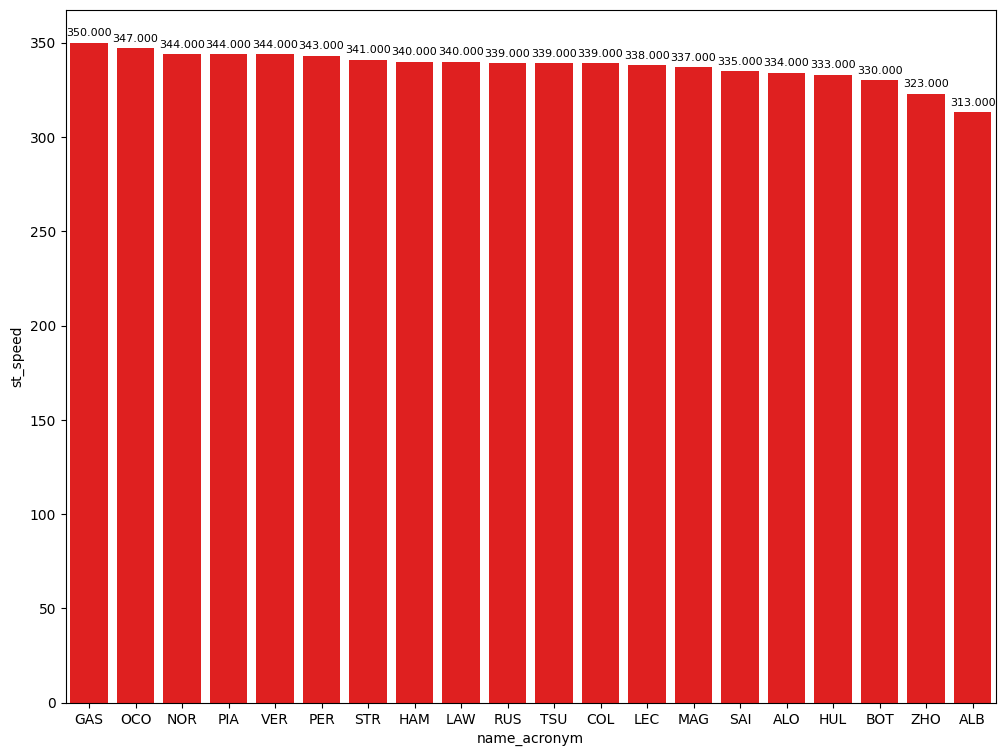

In [9]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

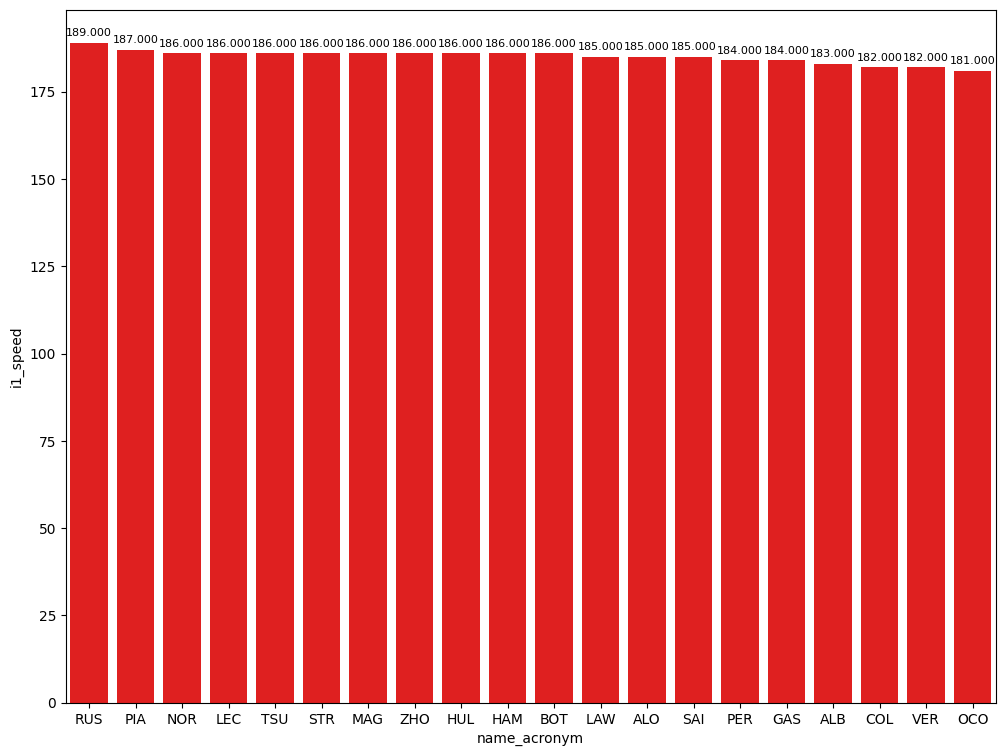

In [10]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

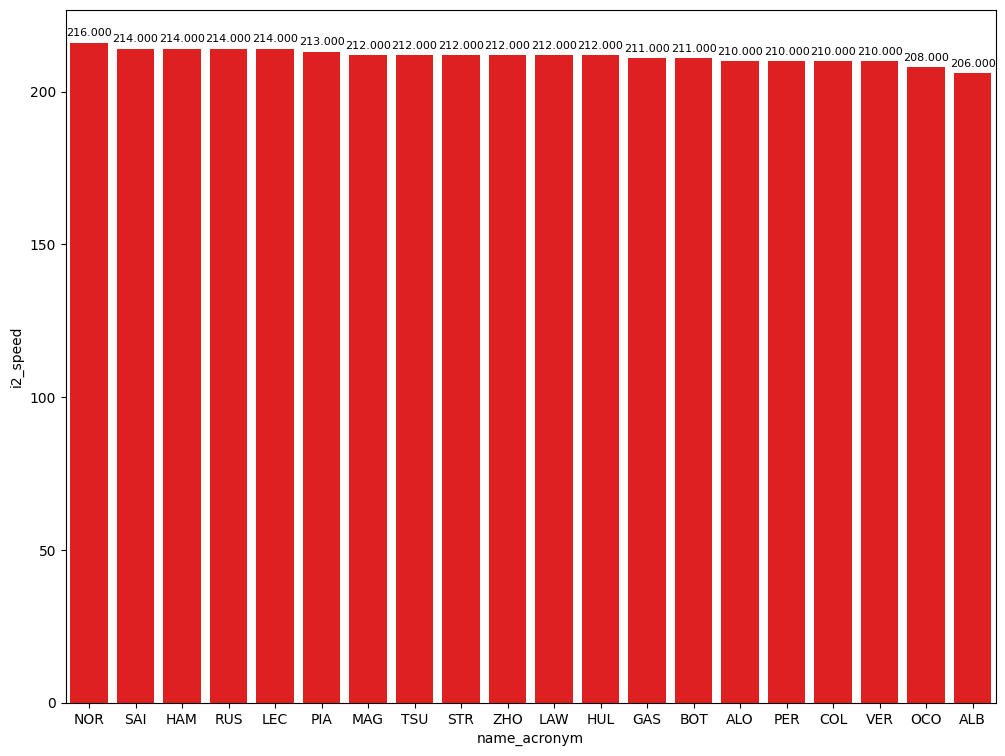

In [11]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Fastest lap per compound
In this section, I will show the best lap with the different compounds of the session. 

In [12]:
compoundsPace = jointables2.loc[jointables2.groupby(['compound'])['lap_duration'].idxmin()]
compoundsPace[['full_name','compound','duration_sector_1','duration_sector_2','duration_sector_3','lap_duration']]

,full_name,compound,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
233,Lando NORRIS,MEDIUM,26.513,31.287,36.036,93.836
265,Lewis HAMILTON,SOFT,26.396,31.413,36.016,93.825
101,ZHOU Guanyu,UNKNOWN,27.629,32.745,37.265,97.639


### Deltas
In this section we can see the deltas of the fastest lap of each driver compared with the fastest lap of the session.Due to changing conditions, only a part of the free practice were important and this part will be taken into consideration.

In [13]:
practiceCleaned = jointables2.query("lap_duration >1")
drivers_list = list(practiceCleaned['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_fastest_lap(driver,practiceCleaned,newdataset)

arr= libraryDataF1.obtain_deltas(newdataset)
newdataset.insert(3,'delta',arr)


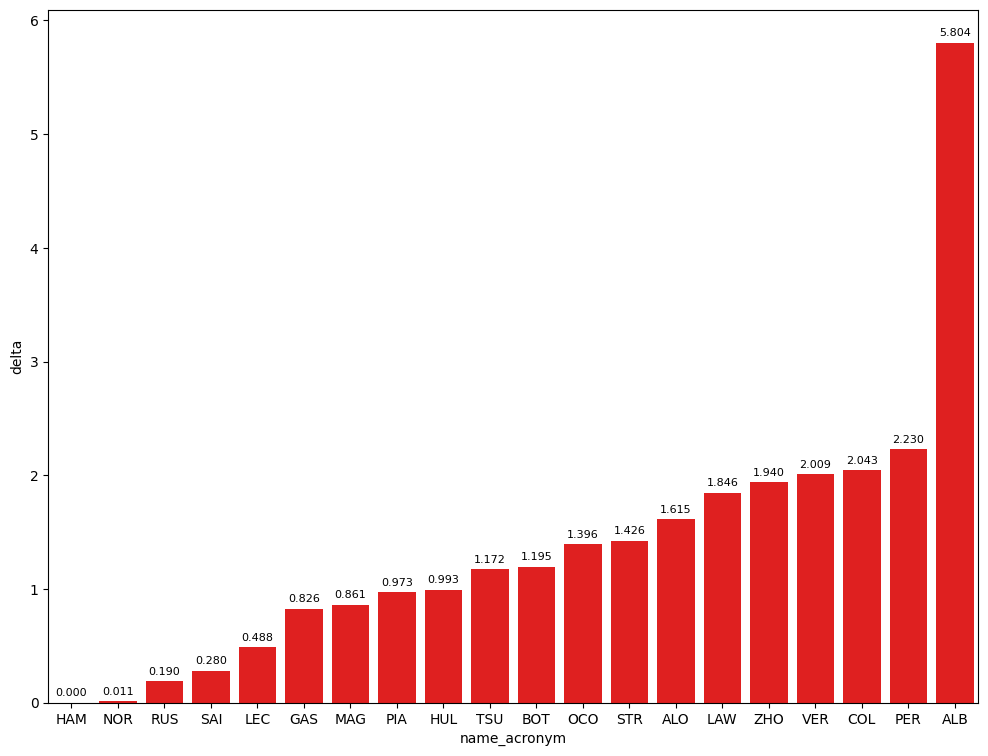

In [14]:
dt = newdataset.sort_values(ascending=True,by='delta')
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Track dominance
In this section, best sector are taken of each sector to see the car's performance in each sector. As I said in the previous section, the changing conditions made that the data obtained in this section are not representatives.

In [15]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_1'].idxmin()].sort_values(by=['duration_sector_1'],ascending=True)
sectorPace[['duration_sector_1','full_name','compound','lap_duration','lap_number']]

,duration_sector_1,full_name,compound,lap_duration,lap_number
255,26.276,George RUSSELL,SOFT,95.623,15
265,26.396,Lewis HAMILTON,SOFT,93.825,14
233,26.513,Lando NORRIS,MEDIUM,93.836,11
272,26.536,Oscar PIASTRI,SOFT,NaN,14
300,26.546,Kevin MAGNUSSEN,SOFT,94.686,12
213,26.572,Charles LECLERC,SOFT,102.262,14
217,26.643,Carlos SAINZ,SOFT,94.105,14
192,26.661,Nico HULKENBERG,SOFT,94.818,8
260,26.678,Fernando ALONSO,SOFT,95.626,14
193,26.747,Valtteri BOTTAS,SOFT,95.020,12


In [16]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_2'].idxmin()].sort_values(by=['duration_sector_2'],ascending=True)
sectorPace[['duration_sector_2','full_name','compound','lap_duration','lap_number']]

,duration_sector_2,full_name,compound,lap_duration,lap_number
233,31.287,Lando NORRIS,MEDIUM,93.836,11
255,31.405,George RUSSELL,SOFT,95.623,15
265,31.413,Lewis HAMILTON,SOFT,93.825,14
217,31.482,Carlos SAINZ,SOFT,94.105,14
148,31.484,Charles LECLERC,MEDIUM,94.476,10
300,31.554,Kevin MAGNUSSEN,SOFT,94.686,12
192,31.575,Nico HULKENBERG,SOFT,94.818,8
203,31.686,Oscar PIASTRI,SOFT,94.798,10
224,31.713,Yuki TSUNODA,SOFT,94.997,10
237,31.714,Pierre GASLY,SOFT,94.651,16


In [17]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_3'].idxmin()].sort_values(by=['duration_sector_3'],ascending=True)
sectorPace[['duration_sector_3','full_name','compound','lap_duration','lap_number']]

,duration_sector_3,full_name,compound,lap_duration,lap_number
217,35.980,Carlos SAINZ,SOFT,94.105,14
265,36.016,Lewis HAMILTON,SOFT,93.825,14
233,36.036,Lando NORRIS,MEDIUM,93.836,11
148,36.128,Charles LECLERC,MEDIUM,94.476,10
204,36.158,Esteban OCON,SOFT,95.221,11
237,36.164,Pierre GASLY,SOFT,94.651,16
170,36.182,George RUSSELL,SOFT,94.015,10
203,36.238,Oscar PIASTRI,SOFT,94.798,10
224,36.388,Yuki TSUNODA,SOFT,94.997,10
193,36.421,Valtteri BOTTAS,SOFT,95.020,12


### Mean pace with the different compound used on the session

In [18]:
race_pace = pd.DataFrame(jointables2.query("is_pit_out_lap == False  and lap_duration>98 and lap_duration <=103").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

,lap_duration
compound,
MEDIUM,99.950035
SOFT,100.027733
UNKNOWN,100.523333


### Long runs

In [19]:
MINIMUN_SECONDS = 98
MAXIMUM_SECONDS = 103

#### Red Bull Racing

In [20]:
stintInformation.query('driver_number == 1 or driver_number == 11')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
7,1250,9638,1,11,1,9,MEDIUM,0
16,1250,9638,1,1,1,11,MEDIUM,0
28,1250,9638,2,11,10,14,SOFT,0
39,1250,9638,2,1,12,14,SOFT,0
49,1250,9638,3,1,15,26,MEDIUM,0
50,1250,9638,3,11,15,26,MEDIUM,0


In [21]:
libraryDataF1.getinfolongruns(jointables2,1,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
305,Max VERSTAPPEN,MEDIUM,2024-11-22T06:45:22.036000+00:00,15,28.502,33.283,37.739,99.524
324,Max VERSTAPPEN,MEDIUM,2024-11-22T06:47:01.525000+00:00,16,28.183,33.192,37.580,98.955
343,Max VERSTAPPEN,MEDIUM,2024-11-22T06:48:40.472000+00:00,17,28.017,32.935,37.552,98.504
361,Max VERSTAPPEN,MEDIUM,2024-11-22T06:50:19.034000+00:00,18,27.833,32.903,37.451,98.187
379,Max VERSTAPPEN,MEDIUM,2024-11-22T06:51:57.194000+00:00,19,28.029,33.035,37.457,98.521
417,Max VERSTAPPEN,MEDIUM,2024-11-22T06:55:24.028000+00:00,21,27.889,33.274,40.178,101.341
435,Max VERSTAPPEN,MEDIUM,2024-11-22T06:57:05.305000+00:00,22,27.938,33.813,37.726,99.477
452,Max VERSTAPPEN,MEDIUM,2024-11-22T06:58:44.850000+00:00,23,28.395,33.634,38.075,100.104


In [22]:
libraryDataF1.getinfolongruns(jointables2,11,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
312,Sergio PEREZ,MEDIUM,2024-11-22T06:46:12.361000+00:00,15,28.983,33.818,37.804,100.605
332,Sergio PEREZ,MEDIUM,2024-11-22T06:47:53.033000+00:00,16,28.440,33.150,37.610,99.200
351,Sergio PEREZ,MEDIUM,2024-11-22T06:49:32.277000+00:00,17,28.203,33.206,37.454,98.863
369,Sergio PEREZ,MEDIUM,2024-11-22T06:51:11.120000+00:00,18,28.405,33.074,37.361,98.840
387,Sergio PEREZ,MEDIUM,2024-11-22T06:52:50.009000+00:00,19,28.111,33.036,37.413,98.560
406,Sergio PEREZ,MEDIUM,2024-11-22T06:54:28.596000+00:00,20,28.130,33.123,37.382,98.635
425,Sergio PEREZ,MEDIUM,2024-11-22T06:56:07.140000+00:00,21,27.977,32.996,37.420,98.393
444,Sergio PEREZ,MEDIUM,2024-11-22T06:57:45.563000+00:00,22,29.831,33.669,37.389,100.889
462,Sergio PEREZ,MEDIUM,2024-11-22T06:59:26.380000+00:00,23,28.369,33.281,37.378,99.028


#### Ferrari

In [23]:
stintInformation.query('driver_number == 55 or driver_number == 16')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
18,1250,9638,1,16,1,12,MEDIUM,0
19,1250,9638,1,55,1,12,MEDIUM,0
42,1250,9638,2,55,13,19,SOFT,0
43,1250,9638,2,16,13,20,SOFT,0
62,1250,9638,3,55,19,30,MEDIUM,0
64,1250,9638,3,16,20,30,MEDIUM,0


In [24]:
libraryDataF1.getinfolongruns(jointables2,16,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
213,Charles LECLERC,SOFT,2024-11-22T06:29:43.514000+00:00,14,26.572,32.970,42.720,102.262
337,Charles LECLERC,SOFT,2024-11-22T06:48:18.862000+00:00,20,28.303,32.765,37.342,98.410
338,Charles LECLERC,MEDIUM,2024-11-22T06:48:18.862000+00:00,20,28.303,32.765,37.342,98.410
356,Charles LECLERC,MEDIUM,2024-11-22T06:49:57.313000+00:00,21,28.072,32.864,37.427,98.363
393,Charles LECLERC,MEDIUM,2024-11-22T06:53:13.581000+00:00,23,27.869,32.799,38.820,99.488
412,Charles LECLERC,MEDIUM,2024-11-22T06:54:53.155000+00:00,24,28.137,32.864,38.465,99.466
449,Charles LECLERC,MEDIUM,2024-11-22T06:58:20.034000+00:00,26,28.156,33.035,37.416,98.607
468,Charles LECLERC,MEDIUM,2024-11-22T06:59:58.638000+00:00,27,28.319,33.527,39.191,101.037


In [25]:
libraryDataF1.getinfolongruns(jointables2,55,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)

,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
27,Carlos SAINZ,MEDIUM,2024-11-22T06:03:32.737000+00:00,2,28.727,33.077,40.592,102.396
326,Carlos SAINZ,MEDIUM,2024-11-22T06:47:17.356000+00:00,20,28.342,33.216,37.531,99.089
345,Carlos SAINZ,MEDIUM,2024-11-22T06:48:56.440000+00:00,21,28.017,33.088,37.761,98.866
363,Carlos SAINZ,MEDIUM,2024-11-22T06:50:35.344000+00:00,22,27.926,33.057,37.385,98.368
381,Carlos SAINZ,MEDIUM,2024-11-22T06:52:13.651000+00:00,23,28.181,33.414,37.182,98.777
418,Carlos SAINZ,MEDIUM,2024-11-22T06:55:30.309000+00:00,25,27.948,32.852,41.931,102.731
437,Carlos SAINZ,MEDIUM,2024-11-22T06:57:13.043000+00:00,26,28.211,33.028,37.274,98.513
454,Carlos SAINZ,MEDIUM,2024-11-22T06:58:51.522000+00:00,27,28.803,33.817,37.584,100.204


#### Mercedes

In [26]:
stintInformation.query('driver_number == 63 or driver_number == 44')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
11,1250,9638,1,44,1,9,MEDIUM,0
12,1250,9638,1,63,1,9,MEDIUM,0
32,1250,9638,2,44,10,16,SOFT,0
35,1250,9638,2,63,10,18,SOFT,0
55,1250,9638,3,44,17,26,SOFT,0
58,1250,9638,3,63,18,30,MEDIUM,0


In [27]:
libraryDataF1.getinfolongruns(jointables2,44,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)



,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
350,Lewis HAMILTON,SOFT,2024-11-22T06:49:28.344000+00:00,17,28.148,33.466,37.774,99.388
368,Lewis HAMILTON,SOFT,2024-11-22T06:51:07.614000+00:00,18,28.061,33.105,37.485,98.651
386,Lewis HAMILTON,SOFT,2024-11-22T06:52:46.358000+00:00,19,27.936,33.259,37.483,98.678
405,Lewis HAMILTON,SOFT,2024-11-22T06:54:24.914000+00:00,20,27.902,33.451,37.559,98.912
424,Lewis HAMILTON,SOFT,2024-11-22T06:56:03.943000+00:00,21,28.372,34.797,38.242,101.411


In [28]:
libraryDataF1.getinfolongruns(jointables2,63,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)



,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
23,George RUSSELL,MEDIUM,2024-11-22T06:03:03.735000+00:00,2,29.580,33.985,38.784,102.349
298,George RUSSELL,SOFT,2024-11-22T06:44:53.059000+00:00,18,29.004,33.925,37.663,100.592
299,George RUSSELL,MEDIUM,2024-11-22T06:44:53.059000+00:00,18,29.004,33.925,37.663,100.592
318,George RUSSELL,MEDIUM,2024-11-22T06:46:33.648000+00:00,19,28.533,33.821,37.418,99.772
336,George RUSSELL,MEDIUM,2024-11-22T06:48:13.457000+00:00,20,28.029,33.628,37.245,98.902
355,George RUSSELL,MEDIUM,2024-11-22T06:49:52.339000+00:00,21,27.945,33.411,37.220,98.576
373,George RUSSELL,MEDIUM,2024-11-22T06:51:30.892000+00:00,22,27.802,33.242,37.104,98.148
392,George RUSSELL,MEDIUM,2024-11-22T06:53:09.036000+00:00,23,28.419,33.512,37.155,99.086
411,George RUSSELL,MEDIUM,2024-11-22T06:54:48.095000+00:00,24,28.142,34.133,38.604,100.879
429,George RUSSELL,MEDIUM,2024-11-22T06:56:29.074000+00:00,25,28.053,33.748,37.533,99.334


#### McLaren

In [29]:
stintInformation.query('driver_number == 81 or driver_number == 4')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
5,1250,9638,1,4,1,8,MEDIUM,0
14,1250,9638,1,81,1,9,MEDIUM,0
25,1250,9638,2,4,9,10,UNKNOWN,0
30,1250,9638,2,81,10,15,SOFT,0
36,1250,9638,3,4,11,14,MEDIUM,0
47,1250,9638,4,4,15,23,MEDIUM,0
52,1250,9638,3,81,16,24,MEDIUM,0
65,1250,9638,5,4,24,26,SOFT,0
66,1250,9638,4,81,25,27,SOFT,0


In [30]:
libraryDataF1.getinfolongruns(jointables2,4,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)



,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
24,Lando NORRIS,MEDIUM,2024-11-22T06:03:11.535000+00:00,2,29.361,33.323,37.321,100.005
66,Lando NORRIS,MEDIUM,2024-11-22T06:06:52.238000+00:00,4,27.450,32.150,38.412,98.012
118,Lando NORRIS,MEDIUM,2024-11-22T06:12:13.353000+00:00,7,27.081,31.799,41.843,100.723
195,Lando NORRIS,UNKNOWN,2024-11-22T06:27:48.208000+00:00,9,26.702,31.795,41.559,100.056
302,Lando NORRIS,MEDIUM,2024-11-22T06:45:12.826000+00:00,15,28.424,32.961,37.449,98.834
322,Lando NORRIS,MEDIUM,2024-11-22T06:46:51.587000+00:00,16,28.126,32.998,37.084,98.208
360,Lando NORRIS,MEDIUM,2024-11-22T06:50:13.690000+00:00,18,28.088,33.023,37.662,98.773
378,Lando NORRIS,MEDIUM,2024-11-22T06:51:52.426000+00:00,19,28.169,33.661,39.314,101.144
397,Lando NORRIS,MEDIUM,2024-11-22T06:53:33.623000+00:00,20,28.851,34.438,37.505,100.794


In [31]:
libraryDataF1.getinfolongruns(jointables2,81,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)



,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
26,Oscar PIASTRI,MEDIUM,2024-11-22T06:03:26.474000+00:00,2,28.446,33.460,37.216,99.122
303,Oscar PIASTRI,MEDIUM,2024-11-22T06:45:15.421000+00:00,16,27.951,32.799,37.413,98.163
342,Oscar PIASTRI,MEDIUM,2024-11-22T06:48:31.064000+00:00,18,27.791,33.286,37.191,98.268
359,Oscar PIASTRI,MEDIUM,2024-11-22T06:50:09.359000+00:00,19,28.051,33.045,37.251,98.347
376,Oscar PIASTRI,MEDIUM,2024-11-22T06:51:47.732000+00:00,20,28.020,33.063,37.570,98.653
394,Oscar PIASTRI,MEDIUM,2024-11-22T06:53:26.295000+00:00,21,28.326,33.541,37.539,99.406
413,Oscar PIASTRI,MEDIUM,2024-11-22T06:55:05.633000+00:00,22,28.238,33.718,37.617,99.573


#### Aston Martin

In [32]:
stintInformation.query('driver_number == 18 or driver_number == 14')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
3,1250,9638,1,14,1,7,MEDIUM,0
6,1250,9638,1,18,1,8,MEDIUM,0
24,1250,9638,2,14,8,16,SOFT,0
26,1250,9638,2,18,9,15,SOFT,0
51,1250,9638,3,18,16,24,MEDIUM,0
54,1250,9638,3,14,17,26,MEDIUM,0
67,1250,9638,4,18,25,28,SOFT,0


In [33]:
libraryDataF1.getinfolongruns(jointables2,14,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)



,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
339,Fernando ALONSO,MEDIUM,2024-11-22T06:48:22.619000+00:00,17,29.744,34.843,38.341,102.928
357,Fernando ALONSO,MEDIUM,2024-11-22T06:50:05.472000+00:00,18,29.516,34.425,38.060,102.001
375,Fernando ALONSO,MEDIUM,2024-11-22T06:51:47.582000+00:00,19,29.830,34.321,38.049,102.200
395,Fernando ALONSO,MEDIUM,2024-11-22T06:53:29.641000+00:00,20,29.216,34.173,38.241,101.630
414,Fernando ALONSO,MEDIUM,2024-11-22T06:55:11.303000+00:00,21,29.479,34.104,38.261,101.844
432,Fernando ALONSO,MEDIUM,2024-11-22T06:56:53.110000+00:00,22,28.759,33.990,38.250,100.999
450,Fernando ALONSO,MEDIUM,2024-11-22T06:58:34.153000+00:00,23,28.529,33.509,39.308,101.346


In [34]:
libraryDataF1.getinfolongruns(jointables2,18,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)



,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
25,Lance STROLL,MEDIUM,2024-11-22T06:03:20.163000+00:00,2,29.382,33.451,37.850,100.683
282,Lance STROLL,MEDIUM,2024-11-22T06:42:54.107000+00:00,16,29.242,33.225,38.112,100.579
315,Lance STROLL,MEDIUM,2024-11-22T06:46:22.834000+00:00,18,28.957,33.536,37.879,100.372
334,Lance STROLL,MEDIUM,2024-11-22T06:48:03.178000+00:00,19,28.477,33.365,37.719,99.561
353,Lance STROLL,MEDIUM,2024-11-22T06:49:42.792000+00:00,20,28.542,33.491,37.938,99.971
371,Lance STROLL,MEDIUM,2024-11-22T06:51:22.724000+00:00,21,28.813,34.439,38.144,101.396
390,Lance STROLL,MEDIUM,2024-11-22T06:53:04.108000+00:00,22,29.072,34.212,38.134,101.418
451,Lance STROLL,SOFT,2024-11-22T06:58:39.154000+00:00,25,28.385,32.778,37.828,98.991


#### RB

In [35]:
stintInformation.query('driver_number == 30 or driver_number == 22')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
2,1250,9638,1,22,1,6,MEDIUM,0
8,1250,9638,1,30,1,9,MEDIUM,0
22,1250,9638,2,22,7,9,MEDIUM,0
27,1250,9638,3,22,10,12,SOFT,0
29,1250,9638,2,30,10,14,SOFT,0
41,1250,9638,4,22,13,13,SOFT,0
44,1250,9638,5,22,14,24,MEDIUM,0
48,1250,9638,3,30,15,25,MEDIUM,0


In [36]:
libraryDataF1.getinfolongruns(jointables2,30,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)



,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
329,Liam LAWSON,MEDIUM,2024-11-22T06:47:31.209000+00:00,15,28.823,33.471,38.086,100.380
348,Liam LAWSON,MEDIUM,2024-11-22T06:49:11.643000+00:00,16,28.675,33.520,37.987,100.182
366,Liam LAWSON,MEDIUM,2024-11-22T06:50:51.856000+00:00,17,28.499,33.744,37.782,100.025
384,Liam LAWSON,MEDIUM,2024-11-22T06:52:31.808000+00:00,18,28.367,33.324,38.787,100.478
403,Liam LAWSON,MEDIUM,2024-11-22T06:54:12.309000+00:00,19,28.484,33.397,37.812,99.693
422,Liam LAWSON,MEDIUM,2024-11-22T06:55:52.093000+00:00,20,28.962,34.218,38.364,101.544
441,Liam LAWSON,MEDIUM,2024-11-22T06:57:33.636000+00:00,21,28.838,34.617,38.529,101.984
460,Liam LAWSON,MEDIUM,2024-11-22T06:59:15.574000+00:00,22,29.175,34.635,38.737,102.547


In [37]:
libraryDataF1.getinfolongruns(jointables2,22,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)



,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
57,Yuki TSUNODA,MEDIUM,2024-11-22T06:06:05.096000+00:00,2,28.126,33.018,37.176,98.320
327,Yuki TSUNODA,MEDIUM,2024-11-22T06:47:21.353000+00:00,14,28.970,33.501,37.879,100.350
346,Yuki TSUNODA,MEDIUM,2024-11-22T06:49:01.720000+00:00,15,28.898,33.345,37.804,100.047
364,Yuki TSUNODA,MEDIUM,2024-11-22T06:50:41.766000+00:00,16,28.740,33.364,37.727,99.831
382,Yuki TSUNODA,MEDIUM,2024-11-22T06:52:21.593000+00:00,17,28.429,33.211,37.371,99.011
401,Yuki TSUNODA,MEDIUM,2024-11-22T06:54:00.572000+00:00,18,28.369,33.126,37.524,99.019
420,Yuki TSUNODA,MEDIUM,2024-11-22T06:55:39.561000+00:00,19,28.604,33.711,37.883,100.198
439,Yuki TSUNODA,MEDIUM,2024-11-22T06:57:19.738000+00:00,20,28.718,33.820,37.906,100.444
456,Yuki TSUNODA,MEDIUM,2024-11-22T06:59:00.242000+00:00,21,28.709,33.577,37.947,100.233


#### Haas

In [38]:
stintInformation.query('driver_number == 20 or driver_number == 27')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
1,1250,9638,1,20,1,5,MEDIUM,0
4,1250,9638,1,27,1,7,MEDIUM,0
21,1250,9638,2,20,6,11,SOFT,0
23,1250,9638,2,27,8,13,SOFT,0
37,1250,9638,3,20,11,14,SOFT,0
45,1250,9638,3,27,14,25,MEDIUM,0
46,1250,9638,4,20,15,21,SOFT,0


In [39]:
libraryDataF1.getinfolongruns(jointables2,20,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)



,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
223,Kevin MAGNUSSEN,SOFT,2024-11-22T06:30:43.377000+00:00,6,29.451,33.679,38.854,101.984
408,Kevin MAGNUSSEN,SOFT,2024-11-22T06:54:40.878000+00:00,15,28.504,33.288,38.215,100.007
427,Kevin MAGNUSSEN,SOFT,2024-11-22T06:56:20.768000+00:00,16,28.451,33.646,38.227,100.324
465,Kevin MAGNUSSEN,SOFT,2024-11-22T06:59:45.016000+00:00,18,27.892,33.478,38.002,99.372


In [40]:
libraryDataF1.getinfolongruns(jointables2,27,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)



,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
309,Nico HULKENBERG,MEDIUM,2024-11-22T06:45:46.863000+00:00,14,28.997,33.061,37.906,99.964
328,Nico HULKENBERG,MEDIUM,2024-11-22T06:47:26.861000+00:00,15,28.288,32.837,37.681,98.806
347,Nico HULKENBERG,MEDIUM,2024-11-22T06:49:05.620000+00:00,16,28.336,33.109,37.718,99.163
365,Nico HULKENBERG,MEDIUM,2024-11-22T06:50:44.887000+00:00,17,28.052,33.227,37.727,99.006
383,Nico HULKENBERG,MEDIUM,2024-11-22T06:52:23.934000+00:00,18,28.287,33.241,37.602,99.130
402,Nico HULKENBERG,MEDIUM,2024-11-22T06:54:03.076000+00:00,19,28.562,33.580,37.924,100.066
421,Nico HULKENBERG,MEDIUM,2024-11-22T06:55:43.067000+00:00,20,28.423,33.385,37.697,99.505
440,Nico HULKENBERG,MEDIUM,2024-11-22T06:57:22.577000+00:00,21,28.533,33.515,37.772,99.820
457,Nico HULKENBERG,MEDIUM,2024-11-22T06:59:02.474000+00:00,22,28.657,33.911,37.714,100.282


#### Alpine

In [41]:
stintInformation.query('driver_number == 10 or driver_number == 31')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
9,1250,9638,1,31,1,9,MEDIUM,0
17,1250,9638,1,10,1,11,MEDIUM,0
31,1250,9638,2,31,10,16,SOFT,0
40,1250,9638,2,10,12,18,SOFT,0
53,1250,9638,3,31,16,27,MEDIUM,0
63,1250,9638,3,10,19,31,MEDIUM,0


In [42]:
libraryDataF1.getinfolongruns(jointables2,31,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)



,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
313,Esteban OCON,SOFT,2024-11-22T06:46:13.842000+00:00,16,28.965,33.762,37.518,100.245
314,Esteban OCON,MEDIUM,2024-11-22T06:46:13.842000+00:00,16,28.965,33.762,37.518,100.245
333,Esteban OCON,MEDIUM,2024-11-22T06:47:54.100000+00:00,17,28.720,33.624,37.269,99.613
352,Esteban OCON,MEDIUM,2024-11-22T06:49:33.810000+00:00,18,28.517,33.440,37.154,99.111
370,Esteban OCON,MEDIUM,2024-11-22T06:51:12.846000+00:00,19,28.366,33.321,37.096,98.783
388,Esteban OCON,MEDIUM,2024-11-22T06:52:51.631000+00:00,20,32.055,33.430,37.373,102.858
407,Esteban OCON,MEDIUM,2024-11-22T06:54:34.660000+00:00,21,28.380,33.424,37.345,99.149
426,Esteban OCON,MEDIUM,2024-11-22T06:56:13.726000+00:00,22,28.565,33.845,37.462,99.872
445,Esteban OCON,MEDIUM,2024-11-22T06:57:53.556000+00:00,23,29.464,34.503,37.803,101.770
463,Esteban OCON,MEDIUM,2024-11-22T06:59:35.398000+00:00,24,28.739,34.081,37.467,100.287


In [43]:
libraryDataF1.getinfolongruns(jointables2,10,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)



,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
73,Pierre GASLY,MEDIUM,2024-11-22T06:07:35.232000+00:00,5,27.523,32.217,38.901,98.641
293,Pierre GASLY,MEDIUM,2024-11-22T06:44:14.244000+00:00,19,28.762,33.771,37.454,99.987
311,Pierre GASLY,MEDIUM,2024-11-22T06:45:54.119000+00:00,20,28.570,33.463,37.171,99.204
349,Pierre GASLY,MEDIUM,2024-11-22T06:49:19.650000+00:00,22,28.490,33.309,37.473,99.272
367,Pierre GASLY,MEDIUM,2024-11-22T06:50:59.047000+00:00,23,28.300,33.347,37.425,99.072
385,Pierre GASLY,MEDIUM,2024-11-22T06:52:37.993000+00:00,24,28.312,33.327,37.406,99.045
404,Pierre GASLY,MEDIUM,2024-11-22T06:54:17.166000+00:00,25,28.521,33.522,37.552,99.595
423,Pierre GASLY,MEDIUM,2024-11-22T06:55:56.609000+00:00,26,28.720,33.710,37.481,99.911
461,Pierre GASLY,MEDIUM,2024-11-22T06:59:21.396000+00:00,28,29.231,34.610,37.718,101.559


#### Williams

In [44]:
stintInformation.query('driver_number == 43 or driver_number == 23')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
0,1250,9638,1,23,1,4,MEDIUM,0
10,1250,9638,1,43,1,9,MEDIUM,0
20,1250,9638,2,23,5,5,MEDIUM,0
34,1250,9638,2,43,10,18,SOFT,0
59,1250,9638,3,43,19,28,MEDIUM,0
68,1250,9638,4,43,29,31,SOFT,0


In [45]:
libraryDataF1.getinfolongruns(jointables2,23,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)



,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
54,Alexander ALBON,MEDIUM,2024-11-22T06:05:53.465000+00:00,2,28.556,33.516,37.557,99.629


In [46]:
libraryDataF1.getinfolongruns(jointables2,43,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)



,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
37,Franco COLAPINTO,MEDIUM,2024-11-22T06:04:20.134000+00:00,3,28.939,33.082,37.111,99.132
236,Franco COLAPINTO,SOFT,2024-11-22T06:32:08.104000+00:00,17,27.103,32.170,41.916,101.189
288,Franco COLAPINTO,MEDIUM,2024-11-22T06:43:29.515000+00:00,19,29.108,33.591,37.979,100.678
301,Franco COLAPINTO,MEDIUM,2024-11-22T06:45:10.173000+00:00,20,28.663,33.180,37.810,99.653
321,Franco COLAPINTO,MEDIUM,2024-11-22T06:46:49.924000+00:00,21,28.377,33.267,37.561,99.205
340,Franco COLAPINTO,MEDIUM,2024-11-22T06:48:29.044000+00:00,22,28.332,33.536,38.247,100.115
358,Franco COLAPINTO,MEDIUM,2024-11-22T06:50:09.124000+00:00,23,29.505,34.159,37.782,101.446
377,Franco COLAPINTO,MEDIUM,2024-11-22T06:51:50.582000+00:00,24,28.816,33.924,39.821,102.561
396,Franco COLAPINTO,MEDIUM,2024-11-22T06:53:33.175000+00:00,25,28.787,33.884,38.282,100.953


#### Kick Sauber

In [47]:
stintInformation.query('driver_number == 24 or driver_number == 77')

,meeting_key,session_key,stint_number,driver_number,lap_start,lap_end,compound,tyre_age_at_start
13,1250,9638,1,77,1,9,MEDIUM,0
15,1250,9638,1,24,1,10,UNKNOWN,0
33,1250,9638,2,77,10,17,SOFT,0
38,1250,9638,2,24,11,17,SOFT,0
56,1250,9638,3,24,18,18,SOFT,0
57,1250,9638,3,77,18,18,SOFT,0
60,1250,9638,4,24,19,29,MEDIUM,0
61,1250,9638,4,77,19,29,MEDIUM,0


In [48]:
libraryDataF1.getinfolongruns(jointables2,24,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)



,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
21,ZHOU Guanyu,UNKNOWN,2024-11-22T06:02:48.974000+00:00,2,30.047,34.689,38.017,102.753
63,ZHOU Guanyu,UNKNOWN,2024-11-22T06:06:41.946000+00:00,4,27.963,33.192,37.606,98.761
325,ZHOU Guanyu,MEDIUM,2024-11-22T06:47:09.354000+00:00,19,29.539,33.969,38.492,102.000
344,ZHOU Guanyu,MEDIUM,2024-11-22T06:48:51.332000+00:00,20,28.870,33.456,38.405,100.731
362,ZHOU Guanyu,MEDIUM,2024-11-22T06:50:32.098000+00:00,21,28.593,33.613,38.297,100.503
380,ZHOU Guanyu,MEDIUM,2024-11-22T06:52:12.570000+00:00,22,28.520,33.402,38.776,100.698
400,ZHOU Guanyu,MEDIUM,2024-11-22T06:53:53.233000+00:00,23,28.662,33.638,38.209,100.509
419,ZHOU Guanyu,MEDIUM,2024-11-22T06:55:33.717000+00:00,24,28.444,33.631,39.007,101.082
438,ZHOU Guanyu,MEDIUM,2024-11-22T06:57:14.910000+00:00,25,28.402,33.564,37.625,99.591
455,ZHOU Guanyu,MEDIUM,2024-11-22T06:58:54.395000+00:00,26,28.828,33.857,37.947,100.632


In [49]:
libraryDataF1.getinfolongruns(jointables2,77,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)



,full_name,compound,date_start,lap_number,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
18,Valtteri BOTTAS,MEDIUM,2024-11-22T06:02:21.630000+00:00,2,28.667,33.349,37.477,99.493
55,Valtteri BOTTAS,MEDIUM,2024-11-22T06:05:57.644000+00:00,4,27.624,32.516,39.992,100.132
335,Valtteri BOTTAS,MEDIUM,2024-11-22T06:48:07.154000+00:00,19,28.838,33.506,37.978,100.322
354,Valtteri BOTTAS,MEDIUM,2024-11-22T06:49:47.415000+00:00,20,28.361,33.214,37.765,99.340
372,Valtteri BOTTAS,MEDIUM,2024-11-22T06:51:26.748000+00:00,21,28.353,33.213,37.810,99.376
391,Valtteri BOTTAS,MEDIUM,2024-11-22T06:53:06.159000+00:00,22,28.334,33.755,37.745,99.834
410,Valtteri BOTTAS,MEDIUM,2024-11-22T06:54:45.997000+00:00,23,29.561,34.361,37.928,101.850
448,Valtteri BOTTAS,MEDIUM,2024-11-22T06:58:10.893000+00:00,25,28.666,34.311,38.128,101.105
467,Valtteri BOTTAS,MEDIUM,2024-11-22T06:59:52.130000+00:00,26,28.986,34.793,38.358,102.137


#### Long runs mean for each driver

In [50]:
longrun_data = libraryDataF1.obtainLongRunData(drivers,jointables2,MINIMUN_SECONDS,MAXIMUM_SECONDS)

##### Sorted by lap duration

In [51]:
sorted_laps = pd.DataFrame(longrun_data,columns=['driver','compound','lap_duration','sector1','sector2','sector3'])

In [52]:
sorted_laps.sort_values(by='lap_duration',ascending=True)

,driver,compound,lap_duration,sector1,sector2,sector3
19,Oscar PIASTRI,MEDIUM,98.790286,28.117571,33.273143,37.399571
3,Sergio PEREZ,MEDIUM,99.223667,28.494333,33.261444,37.467889
0,Max VERSTAPPEN,MEDIUM,99.326625,28.098250,33.258625,37.969750
15,Lewis HAMILTON,SOFT,99.408000,28.083800,33.615600,37.708600
5,Charles LECLERC,MEDIUM,99.505375,27.966375,32.948625,38.590375
11,Nico HULKENBERG,MEDIUM,99.526889,28.459444,33.318444,37.749000
2,Pierre GASLY,MEDIUM,99.587333,28.492111,33.475111,37.620111
1,Lando NORRIS,MEDIUM,99.616556,28.028000,32.905333,38.683222
9,Alexander ALBON,MEDIUM,99.629000,28.556000,33.516000,37.557000
17,George RUSSELL,MEDIUM,99.662000,28.370583,33.716583,37.574833


##### Sorted by sector 1

In [53]:
sorted_laps.sort_values(by='sector1',ascending=True)[['driver','compound','sector1']]

,driver,compound,sector1
5,Charles LECLERC,MEDIUM,27.966375
1,Lando NORRIS,MEDIUM,28.028000
15,Lewis HAMILTON,SOFT,28.083800
0,Max VERSTAPPEN,MEDIUM,28.098250
19,Oscar PIASTRI,MEDIUM,28.117571
16,Carlos SAINZ,MEDIUM,28.269375
17,George RUSSELL,MEDIUM,28.370583
11,Nico HULKENBERG,MEDIUM,28.459444
2,Pierre GASLY,MEDIUM,28.492111
3,Sergio PEREZ,MEDIUM,28.494333


##### Sorted by sector 2

In [54]:
sorted_laps.sort_values(by='sector2',ascending=True)[['driver','compound','sector2']]

,driver,compound,sector2
1,Lando NORRIS,MEDIUM,32.905333
5,Charles LECLERC,MEDIUM,32.948625
16,Carlos SAINZ,MEDIUM,33.193625
0,Max VERSTAPPEN,MEDIUM,33.258625
3,Sergio PEREZ,MEDIUM,33.261444
19,Oscar PIASTRI,MEDIUM,33.273143
11,Nico HULKENBERG,MEDIUM,33.318444
8,Yuki TSUNODA,MEDIUM,33.408111
14,Franco COLAPINTO,MEDIUM,33.421444
2,Pierre GASLY,MEDIUM,33.475111


##### Sorted by sector 3

In [55]:
sorted_laps.sort_values(by='sector3',ascending=True)[['driver','compound','sector3']]

,driver,compound,sector3
19,Oscar PIASTRI,MEDIUM,37.399571
13,Esteban OCON,MEDIUM,37.400500
3,Sergio PEREZ,MEDIUM,37.467889
9,Alexander ALBON,MEDIUM,37.557000
17,George RUSSELL,MEDIUM,37.574833
2,Pierre GASLY,MEDIUM,37.620111
8,Yuki TSUNODA,MEDIUM,37.690778
15,Lewis HAMILTON,SOFT,37.708600
11,Nico HULKENBERG,MEDIUM,37.749000
6,Lance STROLL,MEDIUM,37.950500


#### Long runs mean

In [56]:
longruns_summary = libraryDataF1.obtainMeanLongRuns(drivers,jointables2,MINIMUN_SECONDS,MAXIMUM_SECONDS)

##### Mean pace per compound

In [57]:
libraryDataF1.showDataLongRuns(longruns_summary,"MEDIUM","mean_lap_time",['driver','mean_lap_time'])

,driver,mean_lap_time
19,O PIASTRI,98.790
3,S PEREZ,99.224
5,C LECLERC,99.228
0,M VERSTAPPEN,99.327
11,N HULKENBERG,99.527
1,L NORRIS,99.562
17,G RUSSELL,99.577
2,P GASLY,99.587
9,A ALBON,99.629
8,Y TSUNODA,99.717


In [58]:
libraryDataF1.showDataLongRuns(longruns_summary,"SOFT","mean_lap_time",['driver','mean_lap_time'])

,driver,mean_lap_time
15,L HAMILTON,99.408
7,K MAGNUSSEN,100.422


In [59]:
#libraryDataF1.showDataLongRuns(longruns_summary,"HARD","mean_lap_time",['driver','mean_lap_time'])

## Free Practice 3
### Obtain setup

In [ ]:
practice = libraryDataF1.obtain_information('laps',session_key=9620)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9620)
drivers = libraryDataF1.obtain_information('drivers',session_key=9620)

In [ ]:
drivers.loc[drivers['driver_number']==30,'team_name'] = 'RB'
drivers.loc[drivers['driver_number']==43,'team_name'] = 'Williams'

In [ ]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointables2 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])
jointables2

### See race pace by means of the charts

### Medium tyres

In [ ]:
libraryDataF1.obtain_data_tyres(jointables2,"MEDIUM",81)

### Soft tyres

In [ ]:
libraryDataF1.obtain_data_tyres(jointables2,"SOFT",81)

### Speed trap

In [ ]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['st_speed'].idxmax().dropna()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

In [ ]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

In [ ]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Fastest lap per compound
In this section, I will show the best lap with the different compounds of the session. 

In [ ]:
compoundsPace = jointables2.loc[jointables2.groupby(['compound'])['lap_duration'].idxmin().dropna()]
compoundsPace[['full_name','compound','duration_sector_1','duration_sector_2','duration_sector_3','lap_duration']]

### Deltas
In this section we can see the deltas of the fastest lap of each driver compared with the fastest lap of the session

In [ ]:
practiceCleaned = jointables2.query("lap_duration >1")
drivers_list = list(practiceCleaned['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_fastest_lap(driver,practiceCleaned,newdataset)

arr= libraryDataF1.obtain_deltas(newdataset)
newdataset.insert(3,'delta',arr)


In [ ]:
dt = newdataset.sort_values(ascending=True,by='delta')
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Track dominance
In this section, best sector are taken of each sector to see the car's performance in each sector.

In [ ]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_1'].idxmin().dropna()].sort_values(by=['duration_sector_1'],ascending=True)
sectorPace[['duration_sector_1','full_name','compound','lap_duration','lap_number']]

In [ ]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_2'].idxmin()].sort_values(by=['duration_sector_2'],ascending=True)
sectorPace[['duration_sector_2','full_name','compound','lap_duration','lap_number']]

In [ ]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_3'].idxmin().dropna()].sort_values(by=['duration_sector_3'],ascending=True)
sectorPace[['duration_sector_3','full_name','compound','lap_duration','lap_number']]

### Mean pace with the different compound used on the session

In [ ]:
race_pace = pd.DataFrame(jointables2.query("is_pit_out_lap == False and lap_duration <81 and lap_duration > 79").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

### Long runs

In [ ]:
MINIMUN_SECONDS = 79
MAXIMUM_SECONDS = 81

#### Red Bull Racing

In [ ]:
stintInformation.query('driver_number == 1 or driver_number == 11')

In [ ]:
libraryDataF1.getinfolongruns(jointables2,1,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables2,11,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### Ferrari

In [ ]:
libraryDataF1.getinfolongruns(jointables2,16,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables2,55,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### Mercedes

In [ ]:
stintInformation.query('driver_number == 63 or driver_number == 44')

In [ ]:
libraryDataF1.getinfolongruns(jointables2,44,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables2,63,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### McLaren

In [ ]:
stintInformation.query('driver_number == 81 or driver_number == 4')

In [ ]:
libraryDataF1.getinfolongruns(jointables2,4,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables2,81,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### Aston Martin

In [ ]:
stintInformation.query('driver_number == 18 or driver_number == 14')

In [ ]:
libraryDataF1.getinfolongruns(jointables2,14,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables2,18,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### RB

In [ ]:
stintInformation.query('driver_number == 3 or driver_number == 22')

In [ ]:
libraryDataF1.getinfolongruns(jointables2,3,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables2,22,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### Haas

In [ ]:
libraryDataF1.getinfolongruns(jointables2,20,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables2,27,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### Alpine

In [ ]:
libraryDataF1.getinfolongruns(jointables2,31,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables2,10,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### Williams

In [ ]:
libraryDataF1.getinfolongruns(jointables2,23,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables2,43,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### Kick Sauber

In [ ]:
libraryDataF1.getinfolongruns(jointables2,24,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables2,77,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### Long runs mean for each driver

In [ ]:
longrun_data = libraryDataF1.obtainLongRunData(drivers,jointables2,MINIMUN_SECONDS,MAXIMUM_SECONDS)

##### Sorted by lap duration

In [ ]:
pd.DataFrame(longrun_data,columns=['driver','compound','lap_duration','sector1','sector2','sector3']).sort_values(by='lap_duration',ascending=True)

##### Sorted by sector 1

In [ ]:
pd.DataFrame(longrun_data,columns=['driver','compound','lap_duration','sector1','sector2','sector3']).sort_values(by='sector1',ascending=True)

##### Sorted by sector 2

In [ ]:
pd.DataFrame(longrun_data,columns=['driver','compound','lap_duration','sector1','sector2','sector3']).sort_values(by='sector2',ascending=True)

##### Sorted by sector 3

In [ ]:
pd.DataFrame(longrun_data,columns=['driver','compound','lap_duration','sector1','sector2','sector3']).sort_values(by='sector3',ascending=True)

## Predictions

In [60]:
# Free Practice 1
practice = libraryDataF1.obtain_information('laps',session_key=9637)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9637)
drivers = libraryDataF1.obtain_information('drivers',session_key=9637)

stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointablesfreepractice1 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])

#Free Practice 2
practice = libraryDataF1.obtain_information('laps',session_key=9638)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9638)
drivers = libraryDataF1.obtain_information('drivers',session_key=9638)
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointablesfreepractice2 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])


### Qualyfing prediction

In [73]:
qualy_simulation = libraryDataF1.qualyfing_prediction([jointablesfreepractice1,jointablesfreepractice2],drivers,0.02,0.02,0.01)
qualy_simulation.sort_values(by='qualy_lap_time')

,team,qualy_lap_time,mean_sector_1,mean_sector_2,mean_sector_3
9,Mercedes,94.950869,26.58725,31.926786,36.436833
4,Ferrari,95.450881,26.76075,31.927214,36.762917
1,McLaren,95.659298,26.79400,32.044798,36.820500
0,Red Bull Racing,95.982183,26.90450,32.055583,37.022100
2,Alpine,96.016976,27.11500,32.252060,36.649917
3,Aston Martin,96.118481,26.88950,32.262131,36.966850
5,Haas F1 Team,96.174117,26.88500,32.243417,37.045700
7,Williams,96.714429,27.14800,32.417804,37.148625
8,Kick Sauber,96.997448,27.15775,32.659048,37.180650
6,RB,97.143331,27.34500,32.507381,37.290950


### Race prediction

In [63]:
race_simulation = libraryDataF1.race_prediction(jointablesfreepractice2,drivers,98,103)
race_simulation.groupby('team').mean().sort_values(by='mean_lap_duration')

,mean_lap_duration,mean_sector_1,mean_sector_2,mean_sector_3
team,,,,
McLaren,99.203421,28.072786,33.089238,38.041397
Red Bull Racing,99.275146,28.296292,33.260035,37.718819
Mercedes,99.535000,28.227192,33.666092,37.641717
Ferrari,99.686688,28.117875,33.071125,38.497687
Alpine,99.890317,28.782856,33.597156,37.510306
Haas F1 Team,99.974319,28.516972,33.420597,38.036750
Williams,100.088500,28.590778,33.468722,38.029000
RB,100.285562,28.672993,33.636931,37.975639
Kick Sauber,100.562389,28.692844,33.684883,38.184661


## Qualyfing
### Set up
First of all, it is neccesary to obtain the data about the qualyfing
#### Race control
This section has been added in order to know which laps has been deleted and knowing what happened on track during this session. As every laptime that has been deleted were slow laps, none of them were removed.

In [ ]:
libraryDataF1.obtain_information('race_control',session_key=9621)

### Obtain setup

In [ ]:
qualyfing = libraryDataF1.obtain_information('laps',session_key=9621)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9621)
drivers = libraryDataF1.obtain_information('drivers',session_key=9621)

In [ ]:
drivers.loc[drivers['driver_number']==30,'team_name'] = 'RB'
drivers.loc[drivers['driver_number']==43,'team_name'] = 'Williams'
drivers.loc[drivers['driver_number']==30,'team_colour'] = '6692FF'
drivers.loc[drivers['driver_number']==43,'team_colour'] = '64C4FF'

In [ ]:
session = ff1.get_session(2024, 'Mexico', 'Q')
session.load()
session.laps["LapTimeSeconds"] = session.laps["LapTime"].dt.total_seconds()

In [ ]:
laptimes_deleted = [77.631,77.631,76.638]
driver_number_lap_deleted = [81,16,1]

for ltime_deleted, dn_time_deleted in zip(laptimes_deleted,driver_number_lap_deleted):
    try:
        id_deleted = qualyfing.query("driver_number == @dn_time_deleted and lap_duration == @ltime_deleted").index[0]
        qualyfing = qualyfing.drop(id_deleted)
    except:
        print("Laptime deleted associated with the selected driver does not exist. Please, check again the order of the arrays")

In [ ]:
bestlap = qualyfing.loc[qualyfing.groupby(['driver_number'])['lap_duration'].idxmin()].sort_values(by=['lap_duration'],ascending=True)
bestlap[0:1]

In this case, the fastest lap is 75.946 seconds (1.15.946= so that to obtain the competitve laps the fastest lap will be multiplied by 1.07 81.26 seconds) due to, according to the rules all the drivers have to do unless one lap within this gap.

In [ ]:
competitiveLaps = qualyfing.query("is_pit_out_lap == False and lap_duration <= 81.26")
competitiveLaps

In [ ]:
drivers_list = list(competitiveLaps['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_information_qualy(driver,competitiveLaps,newdataset)
jointables = pd.merge(newdataset,drivers,on=['driver_number'])
jointables.sort_values(by=['fastest_lap'],ascending=True)

#### Best lap per driver compared with the best lap of the session
In this chart we can see the deltas with compared with the fastest lap of the session that it could be different than the pole.

In [ ]:
libraryDataF1.obtainchart("name_acronym","delta",jointables.sort_values(by=['fastest_lap'],ascending=True))

### Speed trap

#### Maximum speed per drivers

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

### Maximum speed per teams

In [ ]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","i2_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","st_speed",top_speed)

In [ ]:
mergequaly = pd.merge(competitiveLaps,drivers,on=['driver_number'])
mergequaly

In order to know when each session finished, race control dataset will be consulted.

In [ ]:
maximumDateQ1 = "date_start <'2024-10-26T21:25:00+00:00'"
maximumDateQ2 = "date_start <'2024-10-26T21:53:00+00:00' and date_start >'2024-10-26T21:25:00+00:00'"
maximumDateQ3 = "date_start >'2024-10-26T21:53:00+00:00'"

### Qualyfing 1

In [ ]:
q1Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ1).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)
q1Data

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver,I will do a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap. 



In [ ]:
#Reference
P15 = q1Data[14:15]
P15

In [ ]:
print(
"Driver:",P15.full_name.to_string(index=False),
"Sector 1: ",P15.duration_sector_1.to_string(index=False),
"Sector 2: ",P15.duration_sector_2.to_string(index=False),
"Sector 3: ",P15.duration_sector_3.to_string(index=False)
)

In [ ]:
q1Data[15::]

##### Analysis of each sector of the driver at risk compared to the drivers eliminated.


In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[15::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P15,newdataset2)

newdataset2

In [ ]:
drivers

In [ ]:
libraryDataF1.draw_gap(P15,15,20,q1Data,drivers,session)

##### Analysis with the drivers that finished better than the driver at risk
I bring this section in order to know where the driver at risk lost his chances to improve in the qualyfing.

In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[0:14].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P15,newdataset2)

newdataset2

#### Best sector per driver
In this section we can see the best sector of the session

In [ ]:
pd.DataFrame(q1Data.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True))

In [ ]:
pd.DataFrame(q1Data.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True))

In [ ]:
pd.DataFrame(q1Data.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True))

### Qualyfing 2

In [ ]:
q2Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ2).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)
q2Data

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [ ]:
#Reference
P10 = q2Data[9:10]
print(
"Driver:",P10.full_name.to_string(index=False),
"Sector 1: ",P10.duration_sector_1.to_string(index=False),
"Sector 2: ",P10.duration_sector_2.to_string(index=False),
"Sector 3: ",P10.duration_sector_3.to_string(index=False)
)

##### Analysis of each sector of the driver at risk compared to the drivers eliminated.


In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q2Data[10::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P10,newdataset2)

newdataset2

In [ ]:

libraryDataF1.draw_gap(P10,10,15,q2Data,drivers,session)
    

##### Analysis with the drivers that finished better than the driver at risk

In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q2Data[0:9].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P10,newdataset2)

newdataset2

#### Best sector per driver
In this section we can see the best sector of the session

In [ ]:
pd.DataFrame(q2Data.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True))

In [ ]:
pd.DataFrame(q2Data.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True))

In [ ]:
pd.DataFrame(q2Data.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True))

### Qualyfing 3

In [ ]:
q3Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ3).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)
q3Data

##### Comparaison with poleman
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [ ]:
#Reference
P1 = q3Data[:1]
print(
"Driver:",P1.full_name.to_string(index=False),
"Sector 1: ",P1.duration_sector_1.to_string(index=False),
"Sector 2: ",P1.duration_sector_2.to_string(index=False),
"Sector 3: ",P1.duration_sector_3.to_string(index=False)
)

##### Analysis of each sector of the poleman compared to the drivers eliminated.



In [ ]:
newdataset2 = pd.DataFrame()
for index,row in q3Data[1::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P1,newdataset2)
newdataset2

In [ ]:
libraryDataF1.draw_gap(P1,1,10,q3Data,drivers,session)

#### Best sector per driver
In this section we can see the best sector of the session

In [ ]:
pd.DataFrame(q3Data.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True))

In [ ]:
pd.DataFrame(q3Data.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True))

In [ ]:
pd.DataFrame(q3Data.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True))

#### Best sector per driver of the session (in general)

In [ ]:
pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True))

In [ ]:
pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True))

In [ ]:
pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True))

## Race
### Obtain setup

In [ ]:
race = libraryDataF1.obtain_information('laps',session_key=9625)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9625)
drivers = libraryDataF1.obtain_information('drivers',session_key=9625)

In [ ]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)

In [ ]:
raceLaps = race.query("is_pit_out_lap == False")
jointables = pd.merge(raceLaps,stintsDataFrame,on=['lap_number','driver_number'])

#### Obtain data tyres


### Hard tyres


In [ ]:
libraryDataF1.obtain_data_tyres(jointables,'HARD',85)

### Medium tyres


In [ ]:
libraryDataF1.obtain_data_tyres(jointables,'MEDIUM',85)

### Soft tyres


In [ ]:
libraryDataF1.obtain_data_tyres(jointables,'SOFT',85)

### Speed trap

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax().dropna()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax().dropna()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax().dropna()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Mean pace with the different compound used on the session

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration >80 and lap_duration <=85").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

### Race pace

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration >80 and lap_duration <=85").dropna().groupby("team_name")['lap_duration'].mean().sort_values(ascending=True))
race_pace

#### Mean race pace per sector
In this section, we can see the pace shown per each team in each sector sorted ascending.

#### Sector 1

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration >80 and lap_duration <=85").dropna().groupby("team_name")['duration_sector_1'].mean().sort_values(ascending=True))
race_pace

#### Sector 2

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False  and lap_duration >80 and lap_duration <=85").dropna().groupby("team_name")['duration_sector_2'].mean().sort_values(ascending=True))
race_pace

#### Sector 3

In [ ]:
race_pace = pd.DataFrame(jointables.query("is_pit_out_lap == False and lap_duration >80 and lap_duration <=85").dropna().groupby("team_name")['duration_sector_3'].mean().sort_values(ascending=True))
race_pace

### Comparaison beetween drivers


#### Red Bull Racing

In [ ]:
race.query("driver_number== 1 and lap_duration >80 and lap_duration <=85").lap_duration.mean()

In [ ]:
race.query("driver_number== 11 and lap_duration >80 and lap_duration <=85").lap_duration.mean()

#### Ferrari

In [ ]:
race.query("driver_number== 16 and lap_duration >80 and lap_duration <=85").lap_duration.mean()

In [ ]:
race.query("driver_number== 55 and lap_duration >80 and lap_duration <=85").lap_duration.mean()

#### McLaren

In [ ]:
race.query("driver_number== 4 and lap_duration >80 and lap_duration <=85").lap_duration.mean()

In [ ]:
race.query("driver_number== 81 and lap_duration >80 and lap_duration <=85").lap_duration.mean()

#### Mercedes

In [ ]:
race.query("driver_number== 44 and lap_duration >80 and lap_duration <=85").lap_duration.mean()

In [ ]:
race.query("driver_number== 63 and lap_duration >80 and lap_duration <=85").lap_duration.mean()

#### Aston Martin

In [ ]:
race.query("driver_number== 14 and lap_duration >80 and lap_duration <=85").lap_duration.mean()

In [ ]:
race.query("driver_number== 18 and lap_duration >80 and lap_duration <=85").lap_duration.mean()

#### Haas F1 Team

In [ ]:
race.query("driver_number== 20 and lap_duration >80 and lap_duration <=85").lap_duration.mean()

In [ ]:
race.query("driver_number== 27 and lap_duration >80 and lap_duration <=85").lap_duration.mean()

#### RB

In [ ]:
race.query("driver_number== 30 and lap_duration >80 and lap_duration <=85").lap_duration.mean()

In [ ]:
race.query("driver_number== 22 and lap_duration >80 and lap_duration <=85").lap_duration.mean()

#### Williams

In [ ]:
race.query("driver_number== 43 and lap_duration >80 and lap_duration <=85").lap_duration.mean()

In [ ]:
race.query("driver_number== 23 and lap_duration >80 and lap_duration <=85").lap_duration.mean()

#### Alpine

In [ ]:
race.query("driver_number== 10 and lap_duration >80 and lap_duration <=85").lap_duration.mean()

In [ ]:
race.query("driver_number== 31 and lap_duration >80 and lap_duration <=85").lap_duration.mean()

#### Kick Sauber

In [ ]:
race.query("driver_number== 24 and lap_duration >80 and lap_duration <=85").lap_duration.mean()

In [ ]:
race.query("driver_number== 77 and lap_duration >80 and lap_duration <=85").lap_duration.mean()

### Race pace

In [ ]:
MINIMUN_SECONDS = 80
MAXIMUM_SECONDS = 85

#### Red Bull Racing

In [ ]:
stintInformation.query('driver_number == 1 or driver_number == 11')

In [ ]:
libraryDataF1.getinfolongruns(jointables,1,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables,11,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### Ferrari

In [ ]:
stintInformation.query('driver_number == 16 or driver_number == 55')

In [ ]:
libraryDataF1.getinfolongruns(jointables,16,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables,55,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### Mercedes

In [ ]:
stintInformation.query('driver_number == 44 or driver_number == 63')

In [ ]:
libraryDataF1.getinfolongruns(jointables,44,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables,63,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### Aston Martin

In [ ]:
stintInformation.query('driver_number == 14 or driver_number == 18')

In [ ]:
libraryDataF1.getinfolongruns(jointables,14,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables,18,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### McLaren

In [ ]:
stintInformation.query('driver_number == 4 or driver_number == 81')

In [ ]:
libraryDataF1.getinfolongruns(jointables,4,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables,81,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### RB

In [ ]:
stintInformation.query('driver_number == 30 or driver_number == 22')

In [ ]:
libraryDataF1.getinfolongruns(jointables,30,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables,22,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### Haas F1 Team

In [ ]:
stintInformation.query('driver_number == 20 or driver_number == 27')

In [ ]:
libraryDataF1.getinfolongruns(jointables,20,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables,27,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### Kick Sauber

In [ ]:
stintInformation.query('driver_number == 24 or driver_number == 77')

In [ ]:
libraryDataF1.getinfolongruns(jointables,24,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables,77,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### Williams

In [ ]:
stintInformation.query('driver_number == 23 or driver_number == 43')

In [ ]:
libraryDataF1.getinfolongruns(jointables,23,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables,43,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)

#### Alpine

In [ ]:
stintInformation.query('driver_number == 10 or driver_number == 31')

In [ ]:
libraryDataF1.getinfolongruns(jointables,31,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)

In [ ]:
libraryDataF1.getinfolongruns(jointables,10,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)

### Pits
Before to finish the analysis, I added the Pits sections where it can see how much time teams spent in the box.

In [ ]:
pit = libraryDataF1.obtain_information('pit',session_key=9625)

In [ ]:
jointables = pd.merge(drivers,pit,on=['driver_number']).query("pit_duration<120")
jointables
pit_duration = pd.DataFrame(jointables.groupby('team_name')['pit_duration'].mean().sort_values(ascending=True))
pit_duration